# Housing prices

Implement from scratch the ridge regression algorithm for regression with square loss (lecture notes on “Linear prediction”). It is OK to use libraries for linear algebra and basic data manipulation (e.g., Numpy and Pandas). Apply the algorithm to the prediction of the label medianHouseValue in this dataset. Study the dependence of the cross-validated risk estimate on the parameter alpha of ridge regression. Try using PCA to improve the risk estimate. Optionally, use nested cross-validated risk estimates to remove the need of choosing the parameter.
Here is a description of the attributes in the dataset.


- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housingMedianAge: Median age of a house within a block; a lower number is a newer building
- totalRooms: Total number of rooms within a block
- totalBedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- medianHouseValue: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea


Note: The dataset has an attribute with missing values and an attribute with categorical values. Find a way of handling these anomalies and justify your choice.

_____________________

## Exploratory view of the data

Since the beginning of our analysis we import the libraries needed to perform the analysis, here it is a detailed list of them:

- **numpy**('np'): a library useful for dealing with ndarrays and large matrices.
    * **linalg**('LA'): it is a sub-module of numpy, it contains efficient linear algebra algorithms.
- **scipy.stats**: a module mainly used for statistical purposes as it contains large number of probability distributions and statistical functions.
- **pandas**('pd'): a data-analysis and manipulation tool which mainly uses Dataframe/series objects.
- **matplotlib.pyplot**('plt'): a library for creating and customizing plots.
- **seaborn**('sns'): a data visualization library based on matplotlib.
- **random**('rd'): a module for generating pseudo-random numbers for various distributions.

Then, we import the original dataset *'California Housing Prices'*, which containes a total of nine features, eight of them which are numeric and one which is categorical, and a label, *'Median house prices'*. It gives information about houses which belong to California districts' derived from the 1990 census. The variables in the data do not have the same unit of measure, since *'longitude'* and *'latitude'* features are used to geographically locate the houses according to how far north/south or east/west a place is, respectively. On the contrary, variables like *'total_rooms'* and *'total_bedrooms'* measure the total number of rooms and, more specific, bedrooms of houses which belong to the same block. Therefore, this characteristic implied in our data should be kept into account when considering to apply some techniques which require the computation of variances, such as *Principal Component Analysis*. 

Here it is a detailed list of the features and the label contained in the dataset:


- *longitude*: A measure of how far west a house is; a higher value is farther west
- *latitude*: A measure of how far north a house is; a higher value is farther north
- *housing_median_age*: Median age of a house within a block; a lower number is a newer building
- *total_rooms*: Total number of rooms within a block
- *total_bedrooms*: Total number of bedrooms within a block
- *population*: Total number of people residing within a block
- *households*: Total number of households, a group of people residing within a home unit, for a block
- *median_income*: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- *ocean_proximity*: Location of the house w.r.t ocean/sea
- *median_house_value*: Median house value for households within a block (measured in US Dollars)

The total number of observations is $20640$ for each feature but for *'total_bedrooms'*, which containes two hundred and seven less non-null values. Therefore, a way to deal with the presence of missing value is to remove the entire tuple, considered as a combination of both the features and the label, since it is not informative and can affect the analysis if is kept inside the dataset. In addition, for this task we would use the **remove_null()** ad-hoc function which only takes one argument, the dataframe containing the datapoints, which act by removing the $NaN$-values and resetting the index of each row. Once the null values are removed, we need to take into account for the presence of the categorical attribute *'ocean_proximity'*, which contains five different values: '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND', which are ordered with respect to their absolute frequencies in the dataset. For regression tasks, categorical variables are often turned into *dummies* that represent binary variables, which take as values (0, 1) depending if a particular condition is satisfied or not. For example in thi setting, if a house if less than one-hour far from the Pacific Ocean, then the corresponding observation in the dataset would take *one* as value for the dummy variable *'<1H OCEAN'*, otherwise it would be *zero*. However, since we are dealing with five unique values of the *'ocean_proximity'* feature, creating one variable for each result would generate a collinearity issue, namely one variable can be predicted from the others (*'collinearity trap'*). This is because the last category is already indicated by having a '0' on all the other dummy variables, thus including the last category just adds redundant information, and can be thought of as the reference group. Therefore, we create five dummies ('INLAND', 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND') and we replace the categorical attribute *'ocean_prximity'* in the original dataset with those five dummies. Before going in-depth with the analysis, it is important to inspect the distribution of each attribute and the label by means of histograms, from which we surely expect to see the values of the five dummies concentrated only on the two extreme points of the interval $[0, 1]$. Those plots reveal the main characteristics of two attributes, which is both the *'housing_median_age'* and *'median_house_value'* are capped at a certain value, namely ages and prices never go beyond that limit. In particular, the first one is capped at 52 years old while the second at 500.001 dollars, which is something that could raise the doubt of being outlier observations because they are far from the median values of both distributions. However, even though techniques that are based on the squared loss function are particularly sensitive to outliers, so does Ridge regression, we decide to keep the problematic observations in the dataset.

Now we inspect the linear relationship between the features and the label, without including the five dummies, by means of the *correlation matrix*. Basically, it is a symmetric matrix that contains as entries the *Pearson correlation index* '$\rho$' computed between each pair of variables, which is interpreted as a measure of the statistical association. The domain of the correlation index is between $[0, 1]$, where '$\rho = ± 1$' indicates perfect positive/negative linear correlation, while '$\rho = 0$' corresponds to the absence of any linear correlation. Once the correlation matrix is plotted, it can be seen that the feature *'median_income'* is moderately correlated with the label since '$\rho = 0.64$', while there is strong positive linear association between some attributes of the dataset. In this setting, having two or more variables which are strongly correlated could end up in a multicollinearity issue, since the presence of all those variables brings redudant information when predicting the response variable. This does not only affect the estimation of the coefficients of those involved variables in the regression, but also all the coefficients of the remaining regressors which affects the performance of the model. For this reason we retrieved the variables which were strongly correlated in absolute value, having '$|\rho| \geq 0.75 $', for example *'total_bedrooms'* and *'households'*, *'total_rooms'* and *'total_bedrooms'* or *'longitude'* and *'latitude'*. However, we can actually exclude among those correlated variables the two geolocalization attributes since their strong negative correlation is implied by the proper shape of California. Coherently, the plot of the dapoints displayed upon the map of California clearly solves the doubt regarding their association measure, which could be seen as *sporious* in this case since they do not explain each other (no collinearity problem). In addition, if we look at the distribution of the observations in the plot we could say that there is much more concentration of the houses contained in the dataset along the coast overall the State. However, regarding the other four highly correlated features, which have all $\rho > 0.85$, the description of the variables in the dataset cleary explains this multicollinearity issue. In fact, it seems quite logic that when the total number of bedrooms increases even the total number of rooms does so, or when the number of households in a block increases even the population of that block does so. In this setting, it seems fair to remove three out of four variables since they all bring redundant information about the magnitude of the houses/blocks contained in the dataset. On the contrary, we know that Ridge regression will take care about this collinearity issue by means of its hyperparameter, the $\alpha$-*penalty*. This is because the main concern with multicollinearity is the variability of the estimates, because a small change in a single data point can wildly swing the coefficient estimates. What the penalty does is biasing towards 0 the estimates of the coefficients, in order to reduce their variability, hence for this reason we decided to keep all the 13 features in the dataset.

In [2]:
# import packages needed throughout the analysis

import numpy as np
np.set_printoptions(precision=8, suppress=True)
from numpy import linalg as LA
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
import random as rd

In [3]:
# import the original dataset 'California Housing'

house_data = pd.read_csv('/Users/francescolazzara/Desktop/Machine Learning project/cal-housing.csv')

type(house_data)

pandas.core.frame.DataFrame

In [4]:
# Get some info about the number of features and the label (number of observations, data-types, etc.)

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# 'median_house_value' is the label in the dataset

house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
def remove_null(dataset):
    
    for i in dataset:
        
        if dataset[i].isnull().sum().sum() == 0:
            continue
            
        else:
            nan_rows = dataset[dataset[i].isnull()]
            dataset = dataset.drop(nan_rows.index, axis=0)
            
    dataset = pd.DataFrame.reset_index(dataset, drop=True)
    
    return(dataset)

In [7]:
house_data = remove_null(house_data)

In [8]:
house_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
house_data["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

[]

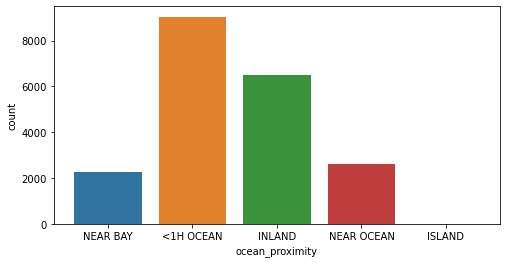

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data = house_data, x = 'ocean_proximity')
plt.plot()

In [11]:
house_dummies = pd.get_dummies(house_data['ocean_proximity'])

In [12]:
house_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [13]:
house_dummies.shape

(20433, 5)

In [14]:
house_data = house_data.drop('ocean_proximity', axis=1)
house_data = pd.concat([house_data, house_dummies], axis=1)
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [15]:
house_data.iloc[:, 0:9].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


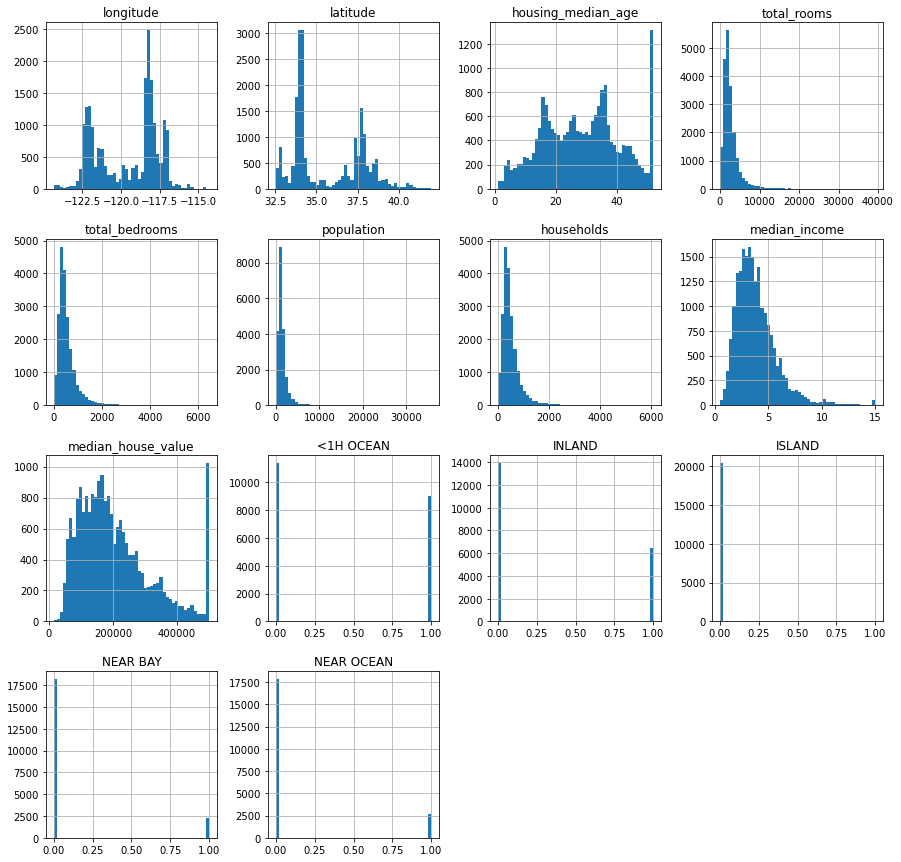

In [16]:
house_data.hist(bins=50, figsize=(15,15))
plt.show()

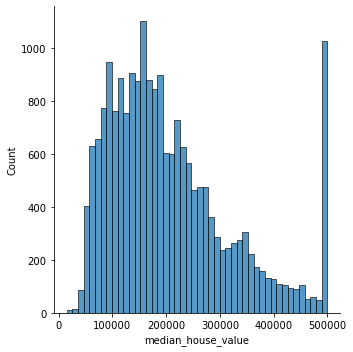

In [17]:
sns.displot(house_data['median_house_value'])

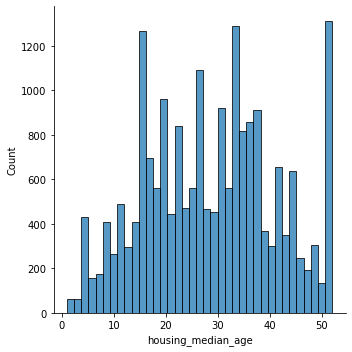

In [18]:
sns.displot(house_data['housing_median_age'])

In [19]:
corr = house_data.iloc[:, 0:9].corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<AxesSubplot:>

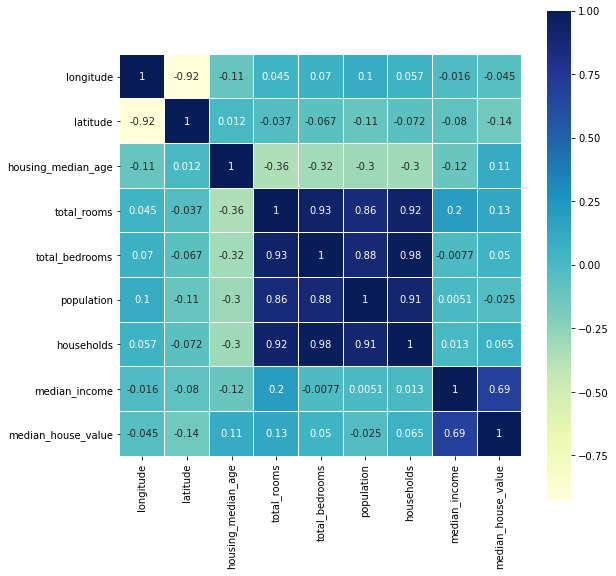

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, linewidths=0.01, square=True, annot=True, cmap="YlGnBu", linecolor='white')

In [21]:
corr[((corr > 0.75) | (corr < -0.75)) & (corr != 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,NaN,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN,0.930380,0.857281,0.918992,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.930380,NaN,0.877747,0.979728,NaN,NaN
population,NaN,NaN,NaN,0.857281,0.877747,NaN,0.907186,NaN,NaN
households,NaN,NaN,NaN,0.918992,0.979728,0.907186,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


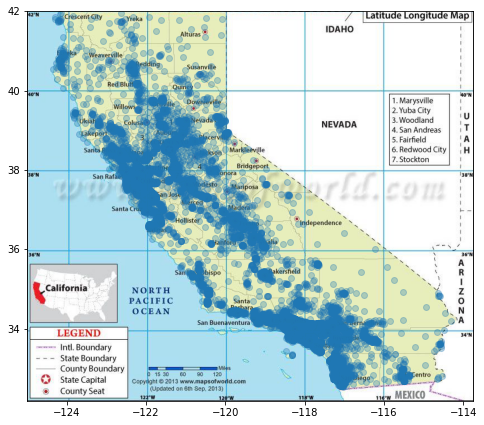

In [22]:
img = plt.imread("California long-lat.jpg")
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img,  extent=[-125, -113.75, 32.18, 42])
plt.plot(house_data['longitude'],house_data['latitude'], 'o', alpha = 0.3)
#plt.title('Location of house blocks in California', fontdict = {'fontsize':15}) 
plt.show()

---

## Feature Pre-processing

Now, we move to split the total number of observations in the dataset into training and test set. In a *Supervised Learning* setting, a **training set** is the set of examples $S = \{(x_1,y_1), (x_2, y_2), ..., (x_m, y_m)\}$ that are given as input to the learning algorithm $A$, which returns as outcome a predictor: $A(S)=h$. A **predictor** (or *classifier*) $h: X \rightarrow Y$ is a function that maps datapoints to labels, which is learned by the algorithm to predict the label of new data (*unseen*) through the examples accessed in $S$. As a result to that, a **test set** $S' = \{(x'_1,y'_1), (x'_2, y'_2), ..., (x'_n, y'_n)\}$, in general with $n < m$, is used to have a measure of how the predictor behaves with unseen data, which come from the same source but are typically disjointed with respect to the training set. In particular, it is mandatory to keep the two sets separate, thus independent, so that the algorithm does not have access to any information about the test examples. However, even though the test set is not given as input to $A$, we are interested in designing an algorithm that outputs a predictor with small test error, namely that has good performance when evaluated on examples not contained in the training set. Coherently, we would partition the whole set of datapoints into train/test set at random, by means of the **train_test()** ad-hoc function that takes the following arguments:

- **features**: DataFrame; set of features describing the datapoints.

- **labels**: DataFrame or Series; colum vector of labels corresponding to the datapoints.

- **test_set_proportion**: integer; the proportion of datapoints to be assigned to the test set with respect to the whole number of datapoints.

- **seed**: integer; seed used for the random assignements of datapoints to the two sets, for reproducibility of the results.

Typically, three-fourth of the observations are assigned to the training set, or equivalently one-fourth are left to the test set, hence we `test_set_proportion = 0.25`. This led to a training set with cardinality $|S| = 15324$ and a test set with $|S'| = 5109$ number of examples, which would be initially kept separated in order to train our learning algorithm and evaluate the performance of the output predictor on the test portion. Before building from scratch our Ridge Regression algorithm, we would construct a class of functions to perform some data pre-processing and feature transformation on the attributes of the data, in order to compare the numerical features with different scales and units. By running the algorithm on some scaled data the estimated weights, or *coefficients* of the separating hyperplane for linear predictors, will update similarly during the training process, hoping to get more accurate predictions. However, encoding the data is not a trivial task and implies some degree of arbitrariness depending on the type of scaling used, which might result in discarding some information contained in the data. In this setting, we would consider three different transformation-methods to change the domain of the features describing the data: *Standardization*, *Normalization* and *Unit-length Scaling*.

**Standardization**, commonly used to compute the *Z-scores*, rescales the values of each feature $ X_j $ for $j=1, ..., d$, by subtracting the mean and dividing by the standard deviation, such that the data are centered around the average value $\mu_j = 0$ with a unit standard deviation $\sigma_j = 1$, as the following formula shows:

$$ x_j(i)' = \frac{x_j(i) - \mu_j} {\sigma_j} $$

Then, **Normalization**, known also as *Min-Max scaling*, aims to reduce the domain of the values of each feature inside the $x_j(i) \in [0,1]$ interval, by substracting the minimum value of the features and dividing by the difference between the maximum and the minimum, and could mitigate the presence of outliers:

$$ x_j(i)' = \frac{x_j(i) - min(x_j(i))} {max(x_j(i)) - min(x_j(i))}$$

While, **Unit-length Scaling** is obtained by dividing the values of each predictor by the norm of the vector, which we measured according to the $L_1$ norm (*Manhattan distance*), for instance, since in some contexts it could be useful such as when dealing with *histogram features* or when there might be some outliers among the datapoints:

$${x_j(i)}' = \frac{x_j(i)}{||x_j||_1}$$

Since our dataset contains five dummy variables, we could worry about the alteration of their values when applying standardization and unit-length scaling, given that normalization would change nothing as they already belong to the unit interval. Even though standardization and unit-length scaling would not affect the relative ordering among the the values, that is their relation would not change, if they are not transformed then there could be some kind of different degree of penalization of the corresponding weights made by the regularizer term $\alpha$, with a lower penalty for larger ranges. In particular, the standardization of dummy variables would not affect the results in this regression setting, since it would not impact on their relationship with the dependent variable. For instance, it would have concerned for clustering tasks since it is scale dependent as well as for distance algorithms, such as *K-NN* and *SVM*, are most affected by the range of the features to determine the similarity between datapoints. On the other hand, the unit-length scaling method would result in features with values significantly smaller in absolute terms, pretty close towards zero, as the norm of the vectors is way larger than their actual values. Still, dummy variables have mean equal to $p$ and variance $p \cdot (1-p)$, where $p$ is the proportion of one's in the vector, which in most of the cases do not affect the fit of the model since are both close to zero and one. In practice, since the difference between scaling or not the dummy variables would only slightly affect the regularization and the fitting of the model, we would stick to the original features.

As we have previously seen, even in the feature transformation step it is essential to maintain the indepence between the training and test set, by separately scaling the datapoints in the two samples. In particular, we would create a scaler using the **features_transformation()** class that only takes one argument:

- **scale_transform**: string; the scaling method to be applied on the features describing the datapoints. Allowed values are "standardization", "normalization" and "unit_length".

Once a scaler object is created for each transformation method, the `fit()` and the `test_transform()` modules of the *features_transformation* class are applied to the features, by using the following arguments:

- .fit(**features**): DataFrame; set of training features describing the datapoints.

- .test_transform(**test_features**): DataFrame; set of test features to be scaled using the parameters computed by the fit() method.

Consistently, the *fit* method would be used on the training data and would save the scaling parameters of the three transformation methods, namely the mean/standard deviation for standardization, max/min for normalization and the norm of the features for the unit-length scaling. On the contrary, the *test_transform* method would be applied to the datapoints in the test set and would scale them using the saved parameters of the training portion, in order to avoid any data leakage during the model testing process. In other words, if we would use the scaling parameters of the test set, we would give some information to our learning algorithm which should have not been known before the predictor is generated. This would of course compromise the statistical significance of our results given that the indepence between the two samples is violated. Accordingly, once the scaler is defined and the training features are transformed, the module in question would be applied to the complementary test set without any threat to their independence.

Once the features are transformed accordingly, the training datapoints would be used to output a predictor from the *Ridge Learner*, while the test portion would be used to compute the test error and get a proxy of the performance of the predictor on random unknown data. Simultaneously, we would use those estimates to get some initial insights about the scaling methods which better describe the data and lead to the best results in terms of prediction. The performances of our learning algorithm could be highly variable depending on the fact that the features are scaled or not, thus we would evaluate the results in all the possible cases, namely with and without transforming the variables. Although, we expect the ridge learner to have better performances with scaled features rather than the original ones, while for *Principal Component Analysis*, in the third section, the new low-dimensional features are likely not to describe appropriately the non-scaled data.

In [23]:
X = house_data.drop(['median_house_value'], axis=1)
Y = pd.DataFrame(house_data['median_house_value'])

In [24]:
X.shape, Y.shape

((20433, 13), (20433, 1))

In [25]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [26]:
Y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20428,78100.0
20429,77100.0
20430,92300.0
20431,84700.0


In [27]:
def train_test(features, labels, test_set_proportion, seed):
    
    # Set a seed for the reproducibility of the results
    rd.seed(a=seed, version=2)
    
    # Train indexes
    train_sample = rd.sample(features.index.tolist(), int(features.shape[0]*(1-test_set_proportion)))
    features_train = features.iloc[train_sample, :]
    
    # Test indexes
    test_sample = np.delete(features.index.tolist(), features_train.index)
    features_test = features.iloc[test_sample, :]
    
    # Training and test labels
    labels_train = labels.iloc[train_sample,:]
    labels_test = labels.iloc[test_sample, :]

    # Re-counting the indexes of the variables from zero
    features_train = features_train.reset_index(drop = True) 
    labels_train = labels_train.reset_index(drop = True)
    
    features_test = features_test.reset_index(drop = True)
    labels_test = labels_test.reset_index(drop = True)
    
    return(features_train, features_test, labels_train, labels_test)

In [28]:
X_train, X_test, Y_train, Y_test = train_test(X, Y, 0.25, 42) # 1 was the original seed!!!

In [29]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15324, 13), (5109, 13), (15324, 1), (5109, 1))

In [30]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.38,34.21,35.0,1468.0,303.0,1295.0,300.0,3.7708,1,0,0,0,0
1,-122.08,37.63,35.0,517.0,108.0,391.0,107.0,4.0682,0,0,0,1,0
2,-117.96,34.53,10.0,2907.0,559.0,1681.0,531.0,3.8594,0,1,0,0,0
3,-118.20,33.79,48.0,2105.0,592.0,1807.0,539.0,2.7183,0,0,0,0,1
4,-118.23,33.96,39.0,405.0,163.0,686.0,164.0,1.6950,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15319,-117.07,33.12,32.0,2474.0,499.0,1224.0,461.0,2.7216,1,0,0,0,0
15320,-118.42,34.30,29.0,3334.0,712.0,2919.0,718.0,3.6548,1,0,0,0,0
15321,-117.99,33.69,12.0,2480.0,858.0,1441.0,788.0,1.6705,1,0,0,0,0
15322,-121.97,37.80,17.0,3279.0,418.0,1222.0,381.0,7.9168,1,0,0,0,0


In [31]:
Y_train

,median_house_value
0,170600.0
1,156900.0
2,141000.0
3,190400.0
4,94800.0
...,...
15319,146300.0
15320,180300.0
15321,350000.0
15322,356000.0


In [32]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,0,0,1,0
1,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,0,0,1,0
2,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,0,0,0,1,0
3,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,0,0,0,1,0
4,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-121.56,39.10,28.0,2130.0,484.0,1195.0,439.0,1.3631,0,1,0,0,0
5105,-121.55,39.09,31.0,1728.0,365.0,1167.0,384.0,1.4958,0,1,0,0,0
5106,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,0,1,0,0,0
5107,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,0,1,0,0,0


In [33]:
Y_test

,median_house_value
0,241400.0
1,261100.0
2,281500.0
3,213500.0
4,140000.0
...,...
5104,45500.0
5105,53400.0
5106,63400.0
5107,115600.0


In [34]:
class features_transformation(): 
      
    def __init__(self, scale_transform): 
                
        self.scale_transform = scale_transform
        
          
    # Transform the features of the training set and save the transformation parameters           
    def fit(self, features):
        
        # Save the columns name of the DataFrame
        features_col = features.columns
        
        # Transform the DataFrame in matrix
        features = np.matrix(features)
        
        if self.scale_transform == 'standardization':
            mean_par = np.mean(features, axis=0)
            std_par = np.std(features, axis=0)
            
            for i in range(0, std_par.shape[1]):

                # +++ NO STANDARDIZATION OF THE DUMMY VARIABLES! +++
                if np.min(features[:, i]) == 0.0 or np.max(features[:, i]) == 1.0:
                    mean_par[0, i] = 0.0
                    std_par[0, i] = 1.0
            
            new_features = np.divide((features - mean_par), std_par)
            new_features = pd.DataFrame(new_features, columns = features_col)
            
            # Standardization parameters (mean, standard deviation) of the training set
            self.mean_par = mean_par
            self.std_par = std_par
            
        elif self.scale_transform == 'normalization':
            min_par = np.min(features, axis=0)
            max_par = np.max(features, axis=0)
            
            for a in range(0, max_par.shape[1]):
                
                # +++ THE DUMMY VARIABLES ARE ALREADY IN THE [0, 1] INTERVAL! +++
                if np.min(features[:, a]) == 0.0 or np.max(features[:, a]) == 1.0:
                    max_par[0, a] = 1.0
                    min_par[0, a] = 0.0
            
            # Normalization parameters (min, max) of the training set
            self.min_par = min_par
            self.max_par = max_par
            
            new_features = np.divide((features - min_par), (max_par - min_par))
            new_features = pd.DataFrame(new_features, columns = features_col)
            
        elif self.scale_transform == 'unit_length':
            unit_norm = np.zeros((1, features.shape[1]))
            
            # Computing the norm of the features vector
            for p in range(0, features.shape[1]):
                
                unit_norm[0, p] = LA.norm(features[:, p], ord = 1, axis = 0)
                
                # +++ NO UNIT-LENGTH SCALING OF THE DUMMY VARIABLES! +++ 
                if np.min(features[:, p]) == 0.0 or np.max(features[:, p]) == 1.0:
                    unit_norm[0, p] = 1.0
                
            self.unit_norm = unit_norm
            
            new_features = np.divide(features, unit_norm)
            new_features = pd.DataFrame(new_features, columns = features_col)
            
        else:
            new_features = features
            
        return(new_features)
    
    
    # Transform the features of the test set with previous transformation parameters
    def test_transform(self, test_features):
        
        test_features_col = test_features.columns
        
        # Transform the DataFrame in matrix
        test_features = np.matrix(test_features)
        
        if self.scale_transform == 'standardization':
            new_test_features = np.divide((test_features - self.mean_par), self.std_par)
            new_test_features = pd.DataFrame(new_test_features, columns = test_features_col)
            
        elif self.scale_transform == 'normalization':
            new_test_features = np.divide((test_features - self.min_par), (self.max_par - self.min_par))
            new_test_features = pd.DataFrame(new_test_features, columns = test_features_col)
            
        elif self.scale_transform == 'unit_length':
            new_test_features = np.divide(test_features, self.unit_norm)
            new_test_features = pd.DataFrame(new_test_features, columns = test_features_col)
            
        else:
            new_test_features = test_features
        
        return(new_test_features)

In [35]:
unit_len = features_transformation(scale_transform = 'unit_length')

standar = features_transformation(scale_transform = 'standardization')

normal = features_transformation(scale_transform = 'normalization')

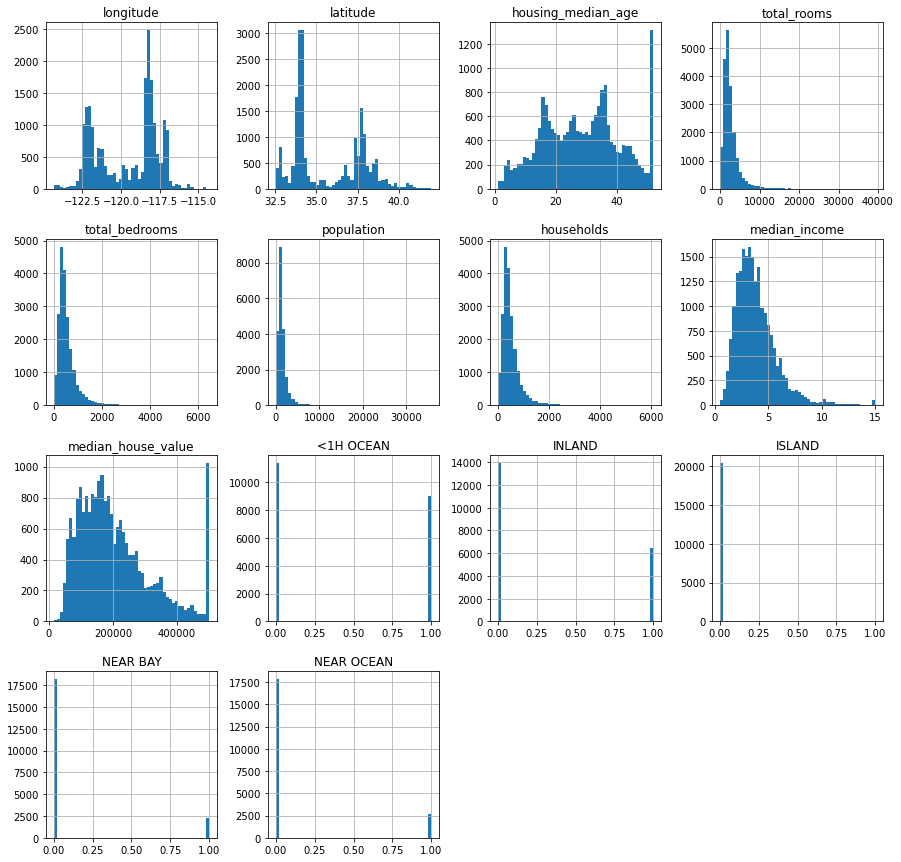

In [36]:
house_data.hist(bins=50, figsize=(15,15))
plt.show()

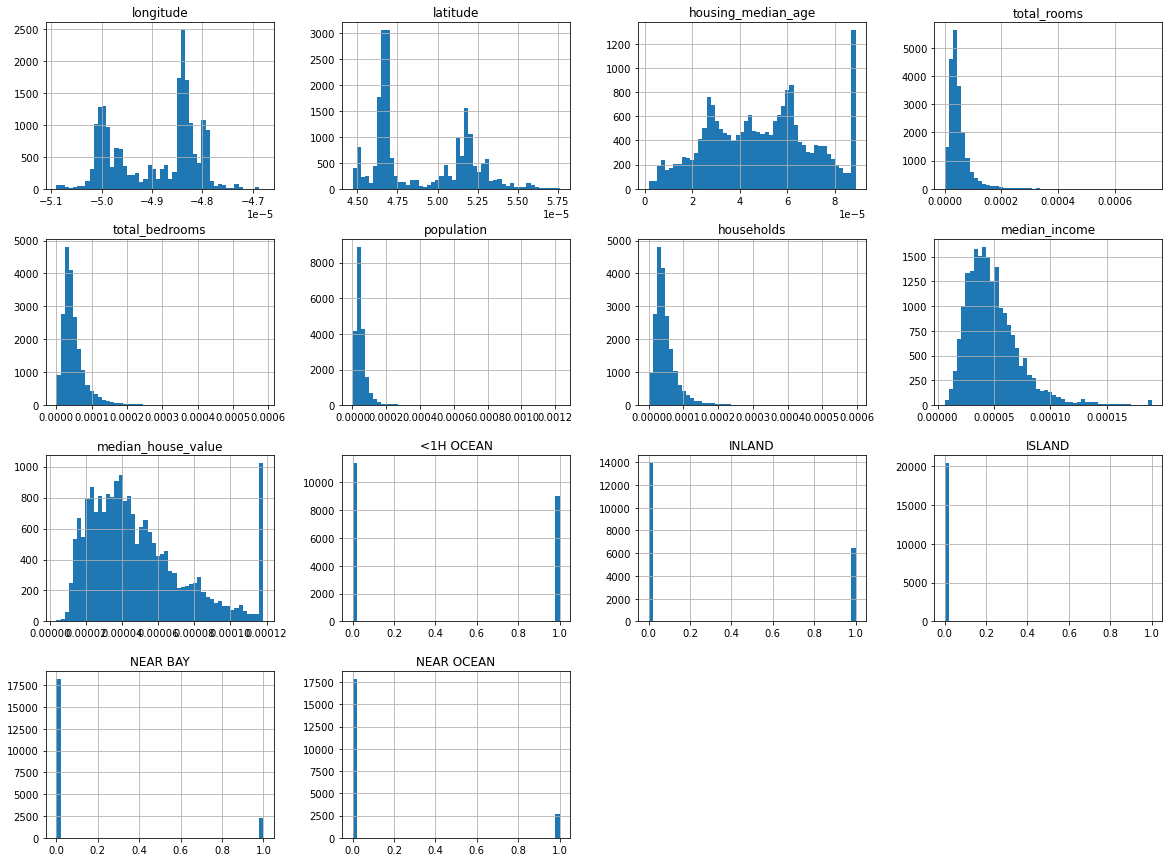

In [37]:
house_data_len = unit_len.fit(house_data)
house_data_len

house_data_len.hist(bins=50, figsize=(20,15))
plt.show()

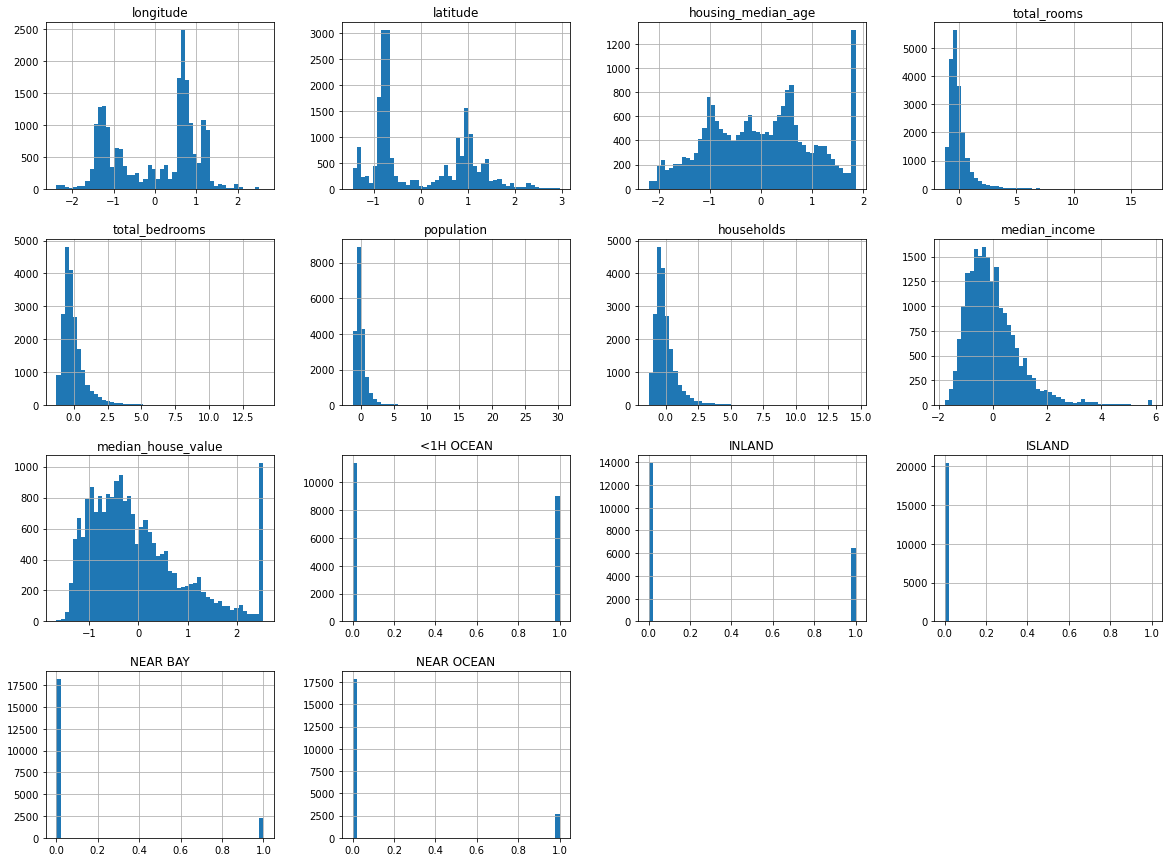

In [38]:
house_data_standar = standar.fit(house_data)
house_data_standar
              
house_data_standar.hist(bins=50, figsize=(20,15))
plt.show()

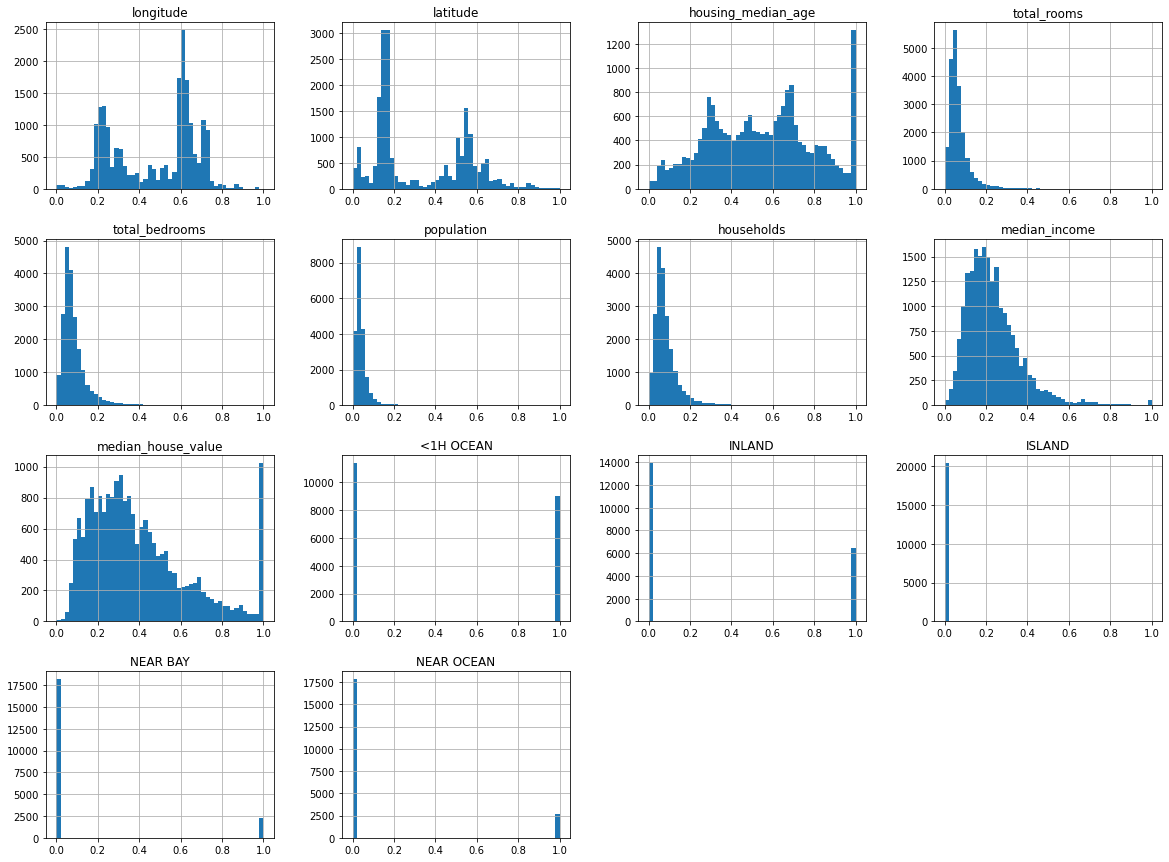

In [39]:
house_data_normal = normal.fit(house_data)
house_data_normal
              
house_data_normal.hist(bins=50, figsize=(20,15))
plt.show()

# Ridge Regression

**+++ THEORY +++**

Now, we would introduce a theoretical backgroud about *Linear Prediction*. In this setting, *Linear predictors* are learned by are parametric learning algorithms, under the form of linear function of the datapoints expressed as vectors of real numbers (integer/floatable data types). In mathematical terms, a **linear predictor** is a function $h: R^d \rightarrow R$ such that $h(x) = f(w^T x)$ for $w \in R^d$. While, in geometrical terms a linear classifier defines an *hyperplane* $\{ x \in R^d: w^T \cdot x = c \}$, described by the pair $(w,c)$, that intersects the vector $w$ at distance $\frac{c}{||w||}$ from the origin. However, we can distinguish between *homogeneous* and *non-homogeneous* linear classifiers, depending whether or not they pass through the origin ($c=0$), with the latter that could be described as one of the former class by slightly transform our vector represention of the datapoints. For instance, we would learn *homogeneous* linear predictors by adding an extra feature to our datapoints, transforming the domain of the features of the examples $(x, y)$ in $x \in R^{d+1}$, with the corresponding element in the vector of coefficients which could be interpreted as the intercept of the model. In summary, the aim of linear prediction is to learn $w$ such that the linear predictions, computed for each datapoint, are as good as possible compared to the corresponding true values of the label (*ground truth*). 

In a **Linear Regression** context, the predictors are parametrized by a vector $w \in R^d$ of real coefficients, each associated to one feature describing the datapoints, where the one corresponding to the extra dimension of previously mentioned could be interpreted as the *intercept* of the model. Given a training set $S_m$ of size $m$, the linear regression predictor is the *Empirical Risk Minimizer* with respect to the square loss:

$$\hat{w} = \underset{w \in R^d}{argmin} \space \sum_{t=1}^{m} l(y_t, h(x_t)) = \underset{w \in R^d}{argmin} \space \sum_{t=1}^{m} (y_t - w^T x_t)^2$$


The *Bayes optimal predictor* that minimizes the statistical risk for regression problems with square loss is $f(x^*) = E[Y | X = x]$. Loss functions for regression tasks typically depend on the difference between the predictedions and the actual labels, thus it could be considered as the "interface" between the algorithm and the data. In *Supervised Learning* scenarios, it is easier to measure since the mistakes/errors can be defined properly and be then fixed, with the **Square Loss** which is defined as the average of the square of the errors:

$$l_D(y, \hat{y}) = (y - \hat{y})^2$$

In particular, the square loss grows up quadratically for $\hat{y} \ne y$ and its first derivative appears to be more informative for the algorithm than the *Asbolute Loss* one $\space l_D(y, \hat{y}) = |y - \hat{y}|$, which only gives binary information. In particular, $\space l'(y, \hat{y}) = -2 (y - \hat{y})$ is differentiable in every point and indicates the amount and sign of the prediction mistake, which is used to adjust the predictions. 

Consequently, we can define the vector of linear predictions as $v = (w^T \cdot x_1, ..., w^T \cdot x_m) \in R^m$ and rewrite the convex optimization problem as:

$$\hat{w} = \underset{w \in R^d}{argmin} \space ||v - y||^2$$

By setting $F(w) = ||v - y||^2$, the ERM of linear regression is computed by setting $\nabla F(w) = 0$:

$$\hat{w} = (S^T S)^{-1} S^T y$$

This finding, which coincide to the *Least square solution*, holds every time the matrix $S^T S$ is *invertible*, namely full-rank (nonsingular). However, the $S^T S$ matrix might not always be invertible, which in mathematical terms correspond to multiple solutions to the minimization problem given by the presence of *linearly dependent* vectors in the matrix we are trying to invert. Still, even in the case the vector $\hat{w}$ has a closed form, it could be highly unstable to some perturbation of the training set. In other words, when $S^T S$ is barely invertible a change of a few examples on $S$ could affect signficantly the elements of $\hat{w}$, which worsen the variance error and would potentially lead to a predictor with high bias and variance (poor overall performances). 

In this context, **Ridge Regression** introduces a regularizer term $\alpha > 0$ to control the bias of the algorithm and obtain a more stable predictor:

$$\hat{w} = {\underset{w\in R^d}{\operatorname{argmin}}{\lVert S\cdot w-y\rVert}^2+\alpha \cdot{\lVert w \rVert}^2}$$

Coherently, the main idea of Ridge regression is to inject some bias in the model, in a controlled way, hoping to produce a larger decrease in the variance, thus creating a biased predictor could provide a more stable and resistant solution to overfitting. Of course, when $\alpha \rightarrow 0: \hat{w}_\alpha \rightarrow \hat{w}$ the two regression problems have the same solution, while for $\alpha\to\infty: \hat{w}_\alpha (0, ..., 0)$ the solution becomes the zero vector since most of the loss is given by the second component. In other words, as $\alpha$ increases the elements of the $\hat{w}_\alpha$ are shrunk towards zero, so that we could think of $\alpha$ as a measure of the stability of the predictor. As before we compute the gradient and we set it equal to zero:

$$\nabla({\lVert S\cdot w-y\rVert}^2+\alpha \cdot{\lVert w \rVert}^2)= 2S^T\cdot (Sw-y)+2\alpha w$$

And we solve for $w$:

$$w = \hat{w}_\alpha = (\alpha I + S^T S)^{-1} \cdot S^T y$$

Now, the $S^T S + \alpha \cdot I$ matrix is *positive definite* and, since the eigenvalues $(\lambda_1, ..., \lambda_d)$ of $S^T S$ are non-negative but some are zero, its eigenvalues $(\lambda_1 + \alpha, ..., \lambda_d + \alpha)$ are all positive such that $S^T S + \alpha \cdot I$ is always invertible provided that $\alpha > 0$. In statistical terms, when all the regression coefficients in $\hat{w}_\alpha$ are penalized towards zero, the variables becomes decorrelated, thus Ridge regression can be used as a solution to multicollinearity between the variables, given that variables which are highly linearly related tend to provide redundant information to the model. Still, the linear regularizer term would set close to zero the elements of $\hat{w}$ corresponding to unimportant features, but not be exactly zero, unless there is perfect multicollinearity.

Furthermore, typically the intercept term is included in the model, as a result of the dimension added to the data to learn homogeneous linear predictors, but the regularization should not apply to this term. In particular, the regularizer term or penalty of the Ridge regression encourages the intercept $\hat{w}_0$ to be small, or equivalently shrunk towards zero. Regardless of the number of features describing the datapoints, having a large intercept, in magnitude, is not indicative of overfitting, thus it does not make sense to shrink also the element $\hat{w}_0$ just because the model contains a lot of variables. Therefore, a small change is made to the algorithm in order to ensure that the intercept term is not affected by the regularizer term $\alpha$. In particular, the first element of the $\alpha \mathbf{I}$ matrix, which is highlighted in red, is set equal to zero as the following image shows:

$$ \alpha \mathbf{I} = \begin{bmatrix}
{\color{red}0} & 0 & 0 & ... & 0\\
0 & 1 & 0 & ... & 0 \\
0 & 0 & 1 & ... & 0 \\
. & . & . & ... & . \\
0 & 0 & 0 & ... & 1 \\
\end{bmatrix}$$

Likewise, when ridge regression is applied to a standardized training set $S$, where the features have been centered to have mean zero and standard deviation one, the estimated coefficient of the intercept $\hat{w}_0$ would be equal to the mean value of the label $\space \bar{y} = \frac{1}{m} \sum_{i=1}^{m}y_i$. Intuitively, the only reason we want to remove the intercept term from the model is that we would need $y_i=0$ when $x_i=0$ for $i = 1, ..., d$, for this reason we would exclusively focus on homogenous linear predictors.

--- 

**+++ FUNCTIONS +++**

Now, we focus on building our Ridge predictor from scratch. At first, we created the class of functions `Ridge()` that would be assigned to a learner and contains all the modules to fit a subset of data and then predicting the response of new features, using the regression parameters of the model. The arguments of the ridge regression class are the following:

- **intercept**: boolean; True if the intercept should be included in the regression model.
- **alpha**: integer; the value of teh regularization parameter (hyperparameter) of ridge regression.

The parameter $\alpha$ is used to control the bias of the algorithm, since as it increases in magnitude all the coefficients of the regression are shrunk towards zero and the variables decorrelated. The main idea of Ridge regression is to inject some bias in the model simultaneously reducing its variance, thus creating a biased predictor could potentially lower the resulting square loss. Moreover, the intercept term is included in the Ridge Regression, but the regularization usually does not apply to the intercept. In particular, when ridge regression is applied to predictors that have been centered to have mean zero, namely the *standardization* method is applied, the estimated intercept would be equal to the mean value of the response $\sum_{i=1}^{N} y_i/n$. The only reason we want to remove the intercept term is that we need $y=0$ when $x=0$, otherwise we would include the intercept by basically adding a column of ones to the dataset. Linear regression suffers from low bias and high variance, namely the estimates of the resulting error could largely differ depending on the training set size, thus Ridge regression might help to obtain more stable estimates of the coefficients and address the collineraity issue at the same time. This is because Ridge ression slightly modifies the loss function of the standard linear regression problem, namely it introduces a regularizer in the *Empirical Risk Minimizer* (ERM) which acts as a penalty applied to the squared-norm of the vector of coefficients. The following formula refers to the ERM of the standard regression problem:

$$\hat{w} = \underset{c \in R^d}{\operatorname{argmin}}{{\lVert S\cdot w - y \rVert}^2}$$

While, Ridge regression uses the following regularized form:

$$\hat{w} = {\underset{c\in R^d}{\operatorname{argmin}}{\lVert S\cdot w-y\rVert}^2+\alpha \cdot{\lVert w \rVert}^2}$$

Where *'S'* is the matrix of the features, *'w'* is the vector of coefficients and *'y'* is the vector of the labels. Of course, when $\alpha = 0$ the two regression problems have the same solution, while for $\alpha\to\infty$ the solution becomes the zero vector since most of the loss is given by the second component of the objective function. Once we compute the gradient, we set it equal to zero and we solve for *'w'*:

$$\nabla({\lVert S\cdot w-y\rVert}^2+\alpha \cdot{\lVert w \rVert}^2)= 2S^T\cdot (Sw-y)+2\alpha w$$

$$w = (\alpha I + S^T S)^{-1} \cdot S^T y$$

In particular, we do not need to worry about the invertibiliy of the matrix $(\alpha I + S^T S)$ since its eigenvalues are basically the sum of each eigenvalue of the $S^T S$ matrix with the chosen parameter $\alpha$, thus being surely invertible for any $\alpha > 0$. This is because with the presence of multicollinearity in the data, the matrix $S^T S$ would result to be singular, hence not invertible. Therefore, there would be multiple solutions to the minimization problem, which in mathematical terms corresponds to some linearly dependent columns in the matrix of the features which we are trying to invert. Fortunately, with Ridge regression the coefficients of unimportant features will be close to zero (but will not be exactly 0 unless there is perfect multicollinearity), hence it would mitigate their contribution to the linear regression and would not result in adding redundant information. 

### $\downarrow$ +++ INCLUDE THE DESCRIPTION OF THE CLASSES IN THE MAIN TEXT +++ $\downarrow$

In our class, in order to fit the data and get the coefficients of the regression we would recall the module '*fit*' of the previously created `Ridge()`, which takes as arguments the following:

- **train_scaled_features**: DataFrame; training features, even previously scaled ones with the "features_transformation" class.
- **labels**: DataFrame; corresponding responses of the training set.

The *'w'* vector of parameters can be recalled by using learner's method *'reg_coef'*, which would be displayed as a dataframe column containing the coefficients of the intercept, if included, and the other predictors. Once the model is fitted on the training portion of the dataset, in order to evaluate its performance and get a raw estimate of the test error we could predict the response values of the held out part, the test one, using the module *'predict'* and passing as argument the required features. The loss function of linear regression is the *Mean Square Error* (MSE) computed as the average of the square of the errors (*square loss*), which are defined as the difference between the predicted values and the actual ones:

$$ MSE = \frac{1}{n} \cdot \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

In order to interpret the resulting value as upper/lower limit of the estimated predictions, or equivalently a measure of accuracy or the average forecast error, one can use an equivalent measure of the MSE, the *'Root Mean Squared Error'* (RMSE):

$$ RMSE = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}$$

In this context, the module *'pred_err'* of the ridge learner allows to compute the RMSE after predicting the label of the test set, just by using two arguments:

- **true_labels**: DataFrame; the actual value of the response variable for corresponding observations in the test set.

- **loss_fun**: string; the value of the loss function to be computed {'mse', 'root_mse'}.

In this section we would present the performance of the ridge learner on the training and test set, as well as by performing *K-fold Cross validation* on the entire dataset. In addition, we would train the model on four different versions of the dataset, the ones obtained on the basis of the scaling methods used (standardized/normalized/unit-length) and the original one, along with the inclusion of not of the intercept. Afterwards, would perform hyperparameter tuning for the Ridge learner by inspecting the validation curve, by plotting the resulting training and validation errors, obtained through k-fold cross validation, against each value of the regularization term $\alpha$. Cross-Validation is a widely used technique to get a more reliable estimate the empirical risk of a learning algorithm, which is a good approximation of the actual error the model would make on an unseen dataset and does not depend on the training/test split performed initially. It starts by randomly sampling $k$-number of folds of almost equal size, then considering $k-1$ folds when training the Ridge predictor and the held out fold as a validation fold. This procedure is then iterated $k$-times, namely each fold should be used as validation one exactly once, with the resulting estimate of the cross validation errors which computed as the mean value of the errors obtained on each training and validation folds:

$$CV_{(k)} = \frac{1}{k} \cdot \sum_{i=1}^{k} \left(\frac{1}{n} \cdot \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 \right)$$

$$\longrightarrow CV_{(k)} = \frac{1}{k} \cdot \sum_{i=1}^{k} MSE_i$$

Hence, if we would like to apply 10-fold cross validation the algorithm would initially use the first fold as the validation set, then the model would be trained on the remaining nine folds and the $MSE_1$ would be computed when evaluated on the held-out fold. Of course, at each iteration of the algorithm we would get ten estimates of the test and training error, which would be averaged to compute the 10-fold CV error as showed above. In this setting, we have created the class '*ValidationCurve*' that takes the four following arguments:

- **features**: DataFrame; set of features of the entire dataset.
- **labels**: DataFrame; corresponding values of the response variable.
- **feat_scaling**: string; selected transformation to be applied to the features {'unit_length', 'standardization', 'normalization'}, None = no transformation.
- **include_intercept**: boolean; True if the intercept should be included in the regression model, default True.

Once the class is assigned to a variables, the module *'val_curve_ridge'* gives as output two 'nd-arrays' containing the traning and validation errors for the selected grid of values of the $\alpha$ parameter. This module takes as takes five arguments:

- **grid_alpha**: numpy.array; set of values for the hyperparameter of the ridge learner $\alpha \in (0, \infty)$.
- **k_folds**: integer; number of folds for the cross validation.
- **loss_fun**: string; the value of the loss function to be computed {'mse', 'root_mse'}.
- **seed**: integer; seed used when defining the observations in each fold, for reproducibility of the results.
- **show_plot**: boolean; default = True, if the plot of the learning curve should be displayed, containing the standard errors of the estimates (shaded area).

Moreover, this function would not only display the plot of the validation curves, but also a dictionary containing the hyperparameter which minimize the cross-validation risk estimate (highlighted in the graph with an arrow) and the corresponding score.

# Tuning hyperparameters on a training/test split

The Ridge Regression algorithm is specified by one hyperparameter $\alpha$ that is not determined by the training set, but is selected before the training process, and its value can lead to overfitting or underfitting. Therefore, there are a family of learning algorithm $A_\alpha: \alpha \in A$, one for each value of the hyperparameter $\alpha$ contained in the set of all possible values $A$. At first, we aim at finding the hyperparameter $\alpha \in A$ that minimizes the risk of the predictor $h_S^{(\alpha)}$ obtained from running the algorithm on a fixed training set $S$, as the following problem explains:

$$\underset{\alpha \in A} {min} \textit{l}_D (A_\alpha(S))$$

Although, the set of hyperparameters $A$ might be very large, so we would make the problem feasible by minimizing the risk over a proper subset of equally spaced values of $A = [1, 5000]$, in this case. Coherently, we would compute the estimate of the risk of the predictor $h_S^{(\alpha)}$ by first splitting the dataset, namely all the data at our disposal, in three chunks:

- *Training set*: $S_{train}$ with proportion 75% of the total observations.
- *Test set*: $S_{test}$ with proportion 25% of the total observations.

Then, $S_val$ would be obtained by splitting again the training set $S_{train}$ and would contain $25\%$ of the datapoints, so that both $S_{train}$ and $S_{val}$ are two subsets of the training data $S = S_{train} \cup S_{del} \space$. In this setting, we would use $S_{train}$ to run the algorithm for each value of the hyperparameter $\forall \alpha \in A$ and $S_{val}$ as a surrogate test set used for testing the resulting predictors $h_S^{(\alpha)}$. The hyperparamter $\hat{\alpha}$ that corresponds to the predictor with the lowest validation error would be trained on the entire training data $S = S_{train} \cup S_{val}$ and would be evaluated on $S_{test}$ to estimate the risk $\textit{l}_D (A_\theta(S))$ for that particular training set.


# Evaluating a learning algorithm using cross-validation

Now, we focus on the problem of estimating $\textit{E}[\textit{l}_D (A_\alpha)]$ that is the **expected risk** (average) of the algorithm $A_\alpha$ that is run on a random training set $S$ of size $m$, from which the expectation is taken. In particular, it measures the performance of the algorithm with a given value for the hyperparameter $A_{\alpha}$ on a typical training set $S$ with a fixed size $m$. This is because when an algorithm is evaluated on a particular train set $S$, we are not scoring the algorithm itself but the predictor $h = A(S)$ which results from a specified train set. In other words, the performance of a predictor on a fixed training set could be good because of random fluctuations of datapoints that could make $S$ a proper training set, even though its risk could actually be larger or lower if $S$ it's "bad", let's say. Hence, the expectations taken over all possible training set $S$ of size $m$ are used to estimate the risk of typical predictor output by a learning algorithm $A$.

## How can we choose a proper value of K?

*K-Fold Cross Validation* is a powerful technique that results in a less biased model. It ensures that every observation contained in the dataset is the chance of appearing in the traning and test sets. In theory, the best approximation to the generalization error of the model is when $K = m$, so that each fold in the cross validation contains exactly one observation. This technique is a special case of the $K$-fold Cross Validation and it is called *Leave-One-Out Cross Validation* (LOOCV). However, the main drawbacks of this procedure is that it is computationally intensive, as it requires the computation of $m$-fits of the model for each $\alpha$ in the grid of the hyperparameter to tune. Instead, a widely accepted compromise with respect to the bias-variance trade-off is obtained by setting $K = \{5,10\}$ and using as a the lowest of the resulting estimates for the risk. Although, this tends to underestimate the risk of the learning algorithm, but typically this difference is small, so we can rely on that. 

For instance, to estimate the $\textit{E}[\textit{l}_D (A_\alpha)]$ for each algorithm in ${A_\alpha: \alpha \in A}$, we can use *K-fold* (external) *cross-validation*. Given $\it{S}$ the entire dataset, we partion $\it{S}$ in $\it{K}$ number of chunks $\it{D}_1, ..., \it{D}_K$, each of approximately the same size $m/K$. The testing part (or validation part) is $\it{D}_k$, composed by the $k$-th fold, while $\it{S}^{(k)}$ is the training part, namely all the folds but the $k$-th one. Therefore, the $K$-fold CV estimate of $\textit{E}[\textit{l}_D (A_\alpha)]$ is computed as the mean value of the errors on the testing part at each iteration $\hat{\textit{l}}_{\textit{D}_k}$: 

$$ \textit{E}[\textit{l}_D (A_\alpha)] = \frac{1}{K} \sum_{k=1}^K \hat{\textit{l}}_{\textit{D}_k}$$

The hyperparameter $\alpha$ of $A_\alpha$ that solves the problem: 

$$\underset{\alpha \in A} {min} \space \space \textit{E}[\textit{l}_D (A_\alpha)]$$

is included in the *best_alpha* method of the ValidationCurve class object.

# ...


# Tuning parameters via nested cross-validation.

Now, the minimization problem is shifted to estimate the expected risk of a learning algorithm $A_\theta (S)$ of a training set $S$ of fixed size, whose examples are randomly drawn:

$$\textit{E}[\underset{\theta \in \Theta} {min} \space \space \textit{l}_D ({A_\theta}(S))]$$

Hence, the objective function measures the performance of $A_\theta$ on a general training set of fixed size, among every possible subset randomly drawn from the dataset. This risk is computed as the average risk over all the training sets $S$ of a given size of $\underset{\theta \in \Theta} {min} \space \space \textit{l}_D ({A_\theta}(S))$, which is equivalent to what is estimated for a fixed training set when tuning the hyperapemeters with the training/test split of the dataset. To estimate this risk we can perform an external cross validation on the for each algorithm $A_\theta: \theta \in \Theta$ and use the lowest K-fold CV estimate, obtained as the average of the testing part of each fold. A more costly option to estimate the risk, in terms of time, is computed by means of nested cross validation, which basically consists in using CV to solve the hyperparameter optimization problem. The idea behind *Nested Cross Validation* is to perform two cross validations, one at an internal level (*inner cv*) the other at the external level (*outer cv*) on the whole dataset. This procedure is more computationally intesive with respect to a simple external cross-validaiton on the entire dataset and it does not return a final model, which can be use for prediction, but an unbiased generalization performance. In other words, it is aimed to reduce overfitting and evaluating the performance of an algorithm by returning a more accurate estimate, which that can be achieved with that particular optimization strategy, or equivalently a less optimistic one ("more honest").

Therefore, we would subset the entire dataset in *K*-folds and we would run an inner cross-validation on the training part for each $A_\theta: \theta \in \Theta$ (grid of hyperparameters). Then, among all the cv estimate for each $A_\theta$, we would pick the $\hat{\theta}$ with the lowest risk estimate and we would run $A_\hat{\theta}$ on the entire training part of the external folds. Consequently, the resulting predictor is evaluated on the testing part (or validation) of the fold and the resulting external cv estimate is used as nested cv estimate of the risk. In addition, the choice of the best hyperparameter is done on each fold of the external cross-validation, with the outer cv which does not test $A_\hat{\theta}$ for a given $\hat{\theta} \in \Theta$, since different hyperparameters can be potentially chosen in the outer cv. Hence, with nested cross-validation we are not measuring the goodness of a predictor generated by the algorithm for a given $\hat{\theta}$, but the average risk of the resulting predictor when the hyperparameter is optimized on the training part through an internal cross-validation. Note that it is not necessarily that the number of folds of the outer cross-validation should be equal to the one of the internal cv, either the latter one is in general lower than the former $K_{inner} < K_{outer}$, of course it is not mandatory.

---

## +++ Training, Validation and Test set for predictor risk (NOT EXPECTED RISK) +++

### THE RISK ESTIMATE DEPEND ON THE TRAINING SET

The resulting risk could be an underestimate or overestimate, it depends on the composition of the datapoints on the training and validation sets, of the actual risk since it is not averaged over all possible traning sets.

In [86]:
# Partition the entire dataset in training-validation (75% + 25%) and test set (25%)

## 75% of the total observations for the training set S
X_train, X_test, Y_train, Y_test = train_test(X, Y, 0.25, 100)

## 25% of the training set S For the validation set S_val
X_train, X_val, Y_train, Y_val = train_test(X_train, Y_train, 0.25, 100)

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((11493, 13), (3831, 13), (5109, 13), (11493, 1), (3831, 1), (5109, 1))

In [87]:
# STANDARDIZATION, but maintaining the independence between the sets!

standard_tvt = features_transformation('standardization')
X_tr_std = standard_tvt.fit(X_train)
X_val_std = standard_tvt.test_transform(X_val)
X_te_std = standard_tvt.test_transform(X_test)

In [88]:
# Find the best hyperparameter

alpha_grid = np.linspace(1, 5000, 20)
val_risk_std = []

for alp_hyp in range(0, len(alpha_grid)):
    
    ridge_learner = Ridge(alpha = alpha_grid[alp_hyp], intercept = True)
    ridge_learner.fit(X_tr_std, Y_train)
    ridge_learner.predict(X_val_std)
    val_risk_std.append(ridge_learner.pred_err(Y_val))

print('Best Hyperparameter: ' + str(alpha_grid[np.where(val_risk_std == np.min(val_risk_std))][0]))
print('Validation error: ' + str(np.min(val_risk_std)))

Best Hyperparameter: 1.0
Validation error: 4727665213.425


In [89]:
# Train the algorithm with the best hyperparameter on the training set S and validate on the test set S_test

X_training_data = pd.concat([X_train, X_val])
Y_training_data = pd.concat([Y_train, Y_val])

# Rescale the test set with the parameters of S +++ NOT S_train +++
X_tr_std = standard_tvt.fit(X_training_data)
X_te_std = standard_tvt.test_transform(X_test)

ridge_learner_test = Ridge(alpha = 1.0, intercept = True)
ridge_learner_test.fit(X_tr_std, Y_training_data)
ridge_learner.predict(X_te_std)
print(ridge_learner.reg_coef)
print('Risk estimate: ' + str(ridge_learner.pred_err(Y_test)))

[[209006.82454464]
 [-10510.15098554]
 [-12095.24130751]
 [ 11783.58042305]
 [  5632.92191796]
 [  5680.75684223]
 [-11019.5221133 ]
 [  5860.40188614]
 [ 52005.55607746]
 [  9988.7920438 ]
 [-23898.26881335]
 [   168.65629504]
 [  6400.35871284]
 [  7340.46176167]]
Risk estimate: 5790274480.567


In [90]:
# UNIT-LENGTH SCALING, but maintaining the independence between the sets!

unitl_tvt = features_transformation('unit_length')
X_tr_unitl = unitl_tvt.fit(X_train)
X_val_unitl = unitl_tvt.test_transform(X_val)
X_te_unitl = unitl_tvt.test_transform(X_test)

# Find the best hyperparameter

alpha_grid = np.linspace(1, 5000, 20)
val_risk_unitl = []

for alp_hyp in range(0, len(alpha_grid)):
    
    ridge_learner = Ridge(alpha = alpha_grid[alp_hyp], intercept = True)
    ridge_learner.fit(X_tr_unitl, Y_train)
    ridge_learner.predict(X_val_unitl)
    val_risk_unitl.append(ridge_learner.pred_err(Y_val))

print('Best Hyperparameter: ' + str(alpha_grid[np.where(val_risk_unitl == np.min(val_risk_unitl))][0]))
print('Validation error: ' + str(np.min(val_risk_unitl)))

Best Hyperparameter: 1.0
Validation error: 10663752329.195


In [91]:
# Train the algorithm with the best hyperparameter on the training set S and validate on the test set S_test

X_training_data = pd.concat([X_train, X_val])
Y_training_data = pd.concat([Y_train, Y_val])

# Rescale the test set with the parameters of S +++ NOT S_train +++
X_tr_unitl = unitl_tvt.fit(X_training_data)
X_te_unitl = unitl_tvt.test_transform(X_test)

ridge_learner_test = Ridge(alpha = 1.0, intercept = True)
ridge_learner_test.fit(X_tr_unitl, Y_training_data)
ridge_learner.predict(X_te_unitl)
print(ridge_learner_test.reg_coef)
print('Risk estimate: ' + str(ridge_learner.pred_err(Y_test)))

[[ 249720.81612341]
 [    -77.06821457]
 [    -24.15594389]
 [   -689.71733452]
 [  13945.63526426]
 [   4058.08307905]
 [  -2947.31172267]
 [   3957.92808163]
 [  32926.20194482]
 [  -8088.42532741]
 [-123933.86491602]
 [ 120661.65932597]
 [  10798.69946247]
 [    561.9314543 ]]
Risk estimate: 10832324743.032


In [92]:
# NORMALIZATION, but maintaining the independence between the sets!

norm_tvt = features_transformation('normalization')
X_tr_norm = norm_tvt.fit(X_train)
X_val_norm = norm_tvt.test_transform(X_val)
X_te_norm = norm_tvt.test_transform(X_test)

# Find the best hyperparameter

alpha_grid = np.linspace(1, 5000, 20)
val_risk_norm = []

for alp_hyp in range(0, len(alpha_grid)):
    
    ridge_learner = Ridge(alpha = alpha_grid[alp_hyp], intercept = True)
    ridge_learner.fit(X_tr_norm, Y_train)
    ridge_learner.predict(X_val_norm)
    val_risk_norm.append(ridge_learner.pred_err(Y_val))

print('Best Hyperparameter: ' + str(alpha_grid[np.where(val_risk_norm == np.min(val_risk_norm))][0]))
print('Validation error: ' + str(np.min(val_risk_norm)))

Best Hyperparameter: 1.0
Validation error: 4796427528.704


In [93]:
# Train the algorithm with the best hyperparameter on the training set S and validate on the test set S_test

X_training_data = pd.concat([X_train, X_val])
Y_training_data = pd.concat([Y_train, Y_val])

# Rescale the test set with the parameters of S +++ NOT S_train +++
X_tr_norm = norm_tvt.fit(X_training_data)
X_te_norm = norm_tvt.test_transform(X_test)

ridge_learner_test = Ridge(alpha = 1.0, intercept = True)
ridge_learner_test.fit(X_tr_norm, Y_training_data)
ridge_learner_test.predict(X_te_norm)
print(ridge_learner_test.reg_coef)
print('Risk estimate: ' + str(ridge_learner_test.pred_err(Y_test)))

[[ 264522.06926071]
 [-249184.1461412 ]
 [-223042.60096312]
 [  56706.31752639]
 [-183681.79230566]
 [ 503228.61856176]
 [-989990.79029793]
 [ 185445.28534232]
 [ 561667.72076912]
 [ -23211.72258454]
 [ -64744.66953376]
 [ 130596.96449357]
 [ -25189.96669682]
 [ -17450.60567914]]
Risk estimate: 4556404874.496


In [94]:
# NO SCALING

# Find the best hyperparameter

alpha_grid = np.linspace(1, 5000, 20)
val_risk = []

for alp_hyp in range(0, len(alpha_grid)):
    
    ridge_learner = Ridge(alpha = alpha_grid[alp_hyp], intercept = True)
    ridge_learner.fit(X_train, Y_train)
    ridge_learner.predict(X_val)
    val_risk.append(ridge_learner.pred_err(Y_val))

print('Best Hyperparameter: ' + str(alpha_grid[np.where(val_risk == np.min(val_risk))][0]))
print('Validation error: ' + str(np.min(val_risk)))

Best Hyperparameter: 264.10526315789474
Validation error: 4726227636.416


In [95]:
# Train the algorithm with the best hyperparameter on the training set S and validate on the test set S_test

X_training_data = pd.concat([X_train, X_val])
Y_training_data = pd.concat([Y_train, Y_val])

ridge_learner_test = Ridge(alpha = 264.10526315789474, intercept = True)
ridge_learner_test.fit(X_training_data, Y_training_data)
ridge_learner_test.predict(X_test)
print(ridge_learner_test.reg_coef)
print('Risk estimate: ' + str(ridge_learner_test.pred_err(Y_test)))

[[-2180759.92813637]
 [  -25821.60576289]
 [  -24956.92716139]
 [    1137.46522899]
 [      -6.19774649]
 [      99.52933533]
 [     -38.36417618]
 [      51.55592451]
 [   39216.90690342]
 [    8858.72834723]
 [  -28510.94097971]
 [    2851.53048429]
 [    4924.5834005 ]
 [   11876.09874767]]
Risk estimate: 4531076414.628


In [96]:
np.format_float_scientific(4531076414.628) # NO SCALING

'4.531076414628e+09'

In [97]:
np.format_float_scientific(5790274480.567)  # standardization

'5.790274480567e+09'

In [98]:
np.format_float_scientific(4556404874.496) # normalization

'4.556404874496e+09'

In [99]:
np.format_float_scientific(10832324743.032) # unit-length scaling

'1.0832324743032e+10'

# +++ How can we not penalize the intercept? +++

The regularizer term or penalty of the Ridge regression encourages the intercept $w_0$ to be small, or equivalently shrunk towards zero, as the other regression coefficients. Regardless of the number of features included in the ridge regression, having a large intercept, in magnitude, is not indicative of overfitting, thus it does not make sense to shrink also $w_0$ just because the model is flexible, namely it contains a lot of variables. Therefore, a small modification is made to the algorithm in order to ensure that the intercept term is not affected by the $\alpha$-penalty. In particular, the first element of the matrix obtained by the product of the regularizer term and the identity matrix ($\alpha \mathbf{I}$), which is highlighted in red, is set equal to zero. Coherently, the resulting matrix would seem like this:

$$ \alpha \mathbf{I} = \begin{bmatrix}
{\color{red}0} & 0 & 0 & ... & 0\\
0 & 1 & 0 & ... & 0 \\
0 & 0 & 1 & ... & 0 \\
. & . & . & ... & . \\
0 & 0 & 0 & ... & 1 \\
\end{bmatrix}$$

In [43]:
# Ridge Regression 
  
class Ridge():
      
    def __init__(self, intercept, alpha): 
          
        self.alpha = alpha            
        self.intercept = intercept
        
          
    # Fit a regression model on a SCALED version of the training set (or original one if no transformation)
    def fit(self, train_scaled_features, labels):
        
        labels = np.array(labels)
        
        # Add the intercept in the final model (column of ones)
        if self.intercept == True:
            intercept_col = np.ones((train_scaled_features.shape[0],1))
            train_scaled_features =  np.append(intercept_col, train_scaled_features, axis=1)
            
            # Compute the solution of the minimization problem of the gradient
            alpha_I = self.alpha * np.identity(train_scaled_features.shape[1])
            alpha_I[0,0] = 0.0    # +++ Don't penalize the intercept! +++
        
            inverse_mat = LA.inv(train_scaled_features.T @ train_scaled_features + alpha_I)
            reg_coef = inverse_mat @ train_scaled_features.T @ labels
            
        else:
            alpha_I = self.alpha * np.identity(train_scaled_features.shape[1])
            inverse_mat = LA.inv(train_scaled_features.T @ train_scaled_features + alpha_I)
            reg_coef = inverse_mat @ train_scaled_features.T @ labels
        
        self.reg_coef = reg_coef
        self.train_scaled_features = train_scaled_features
        
    
    # Predict the labels of the test set using the coefficients of the trained model
    def predict(self, test_scaled_features):
        
        test_scaled_features = np.matrix(test_scaled_features)
            
        if self.intercept == True:
            intercept_col = np.ones((test_scaled_features.shape[0],1))
            test_scaled_features =  np.append(intercept_col, test_scaled_features, axis=1)
            
        
        predictions = np.array(test_scaled_features.dot(self.reg_coef))
        
        self.predictions = predictions
        
        return(self.predictions)
    
    
    # Compute the average of the square loss (test error)
    def pred_err(self, true_labels):
                
        true_labels = np.array(true_labels)
        ridge_loss = np.mean((true_labels - self.predictions)**2)
            
        return(np.round(ridge_loss,3))

In [310]:
# Validation curve

class ValidationCurve(): 
      
    # Define the main arguments to be included in the learning curve analysis
    def __init__(self, features, labels, feat_scaling, include_intercept = True): 
        
        self.features = features
        self.labels = labels
        self.feat_scaling = feat_scaling
        self.include_intercept = include_intercept
        
    def val_curve_ridge(self, grid_alpha, k_folds, seed, show_plot = True):
        
        # Arrays for the training and validation errors
        train_errors = np.zeros((len(grid_alpha), k_folds))
        cross_val_errors = np.zeros((len(grid_alpha), k_folds))
        
        # +++ Random shuffle of the features and labels +++
        idx = np.random.RandomState(seed = seed).permutation(len(self.features))
        feat_shuff, labl_shuff = self.features.loc[idx, :], self.labels.loc[idx, :]
        
        # K-number of folds are created for the cross validation
        feat_folds, labl_folds = np.array_split(feat_shuff, k_folds), np.array_split(labl_shuff, k_folds)
    
        for alp in range(0, len(grid_alpha)):
            
            # CV main loop
            for i in range(0, k_folds):
            
                ridge_learner = Ridge(alpha = grid_alpha[alp], intercept = self.include_intercept)
                        
                # Set the first fold as the validation one
                f_val = feat_folds[i]
                l_val = labl_folds[i]
            
                # Set the remaining k-1 folds as the training ones 
                f_train = feat_shuff.drop(f_val.index)
                l_train = labl_shuff.drop(l_val.index)
                
                # transform the features without breaking the independence of train and validation sets
                if self.feat_scaling is not None:
                    transformer = features_transformation(self.feat_scaling)
                    f_train = transformer.fit(f_train)
                    f_val = transformer.test_transform(f_val)
            
                ridge_learner.fit(f_train, l_train)
            
                # Compute the estimate of the error according to the square loss                            
                train_pred = ridge_learner.predict(f_train)
                train_errors[alp, i] = np.mean((train_pred - l_train)**2)
        
                ridge_learner.predict(f_val)
        
                cross_val_errors[alp, i] = ridge_learner.pred_err(l_val)
                
        # Compute the mean validation errors for each alpha in the grid
        val_score_mean = np.mean(cross_val_errors, axis=1)
        
        best_ind = np.where(val_score_mean == np.min(val_score_mean))
        best_alpha = grid_alpha[best_ind]

        self.best_alpha = best_alpha[0]
        
        train_score_mean = np.mean(train_errors, axis=1)
        train_score_std = np.std(train_errors, axis=1)
        val_score_std = np.std(cross_val_errors, axis=1)   
            
        # Plot the validation curve
        if show_plot == True:
            
            plt.figure(figsize=(12,7))
            plt.plot(grid_alpha, val_score_mean, 'o-', label='CV error estimate')
            plt.plot(grid_alpha, train_score_mean, 'o-', label='Training error')
            
            plt.fill_between(grid_alpha, val_score_mean - val_score_std, 
                 val_score_mean + val_score_std, alpha=0.1, color='r', label = 'CV estimate std. deviation')
            plt.fill_between(grid_alpha, train_score_mean - train_score_std, 
                train_score_mean + train_score_std, alpha=0.1, color='g', label = 'Train error std. deviation')
        
            plt.legend(loc = 'upper left')
            #plt.title('Validation Curve - ' + str(self.feat_scaling))
            plt.xlabel('alpha')
            plt.ylabel('Average square loss')
            plt.annotate('min.', xy=(grid_alpha[best_ind], val_score_mean[best_ind]), 
                xytext = (grid_alpha[best_ind], val_score_mean[best_ind]+0.01*val_score_mean[best_ind]),
                         arrowprops=dict(arrowstyle="->"))
            #plt.savefig(str(self.feat_scaling) + ' - valcurve')
            plt.show()
            
            dict_cv = {'best_parameter': self.best_alpha, 'cv_risk_score': np.min(val_score_mean)}
            self.dict_cv = dict_cv
            print(dict_cv)
            
        return(train_errors, cross_val_errors)
        
        
    # Look at the dependence of the validation error with respect to the number of principal components
    def val_curve_pca(self, grid_princomp, k_pcafolds, seed, show_plot = True):
        
        # Arrays for the training and validation principal component errors
        train_pca_curve_err = np.zeros((len(grid_princomp), k_pcafolds))
        val_pca_curve_err = np.zeros((len(grid_princomp), k_pcafolds))
        
        # +++ Random shuffle of the features and labels +++
        idx_pca = np.random.RandomState(seed = seed).permutation(len(self.features))
        feat_shuff_pca, labl_shuff_pca = self.features.loc[idx_pca, :], self.labels.loc[idx_pca, :]
    
        # K-number of folds are created
        feat_folds_pca, labl_folds_pca = np.array_split(feat_shuff_pca, k_pcafolds), np.array_split(labl_shuff_pca, k_pcafolds)
    
        for pc in range(0, len(grid_princomp)):
        
            # Cross Validation algorithm
            for i in range(0, k_pcafolds):
            
                ridge_learner = Ridge(alpha = self.best_alpha, intercept = self.include_intercept)
                
                # Held out fold as validation one
                f_val = feat_folds_pca[i]
                l_val = labl_folds_pca[i]
                
                # K-1 folds as training ones
                f_train = feat_shuff_pca.drop(f_val.index)
                l_train = labl_shuff_pca.drop(l_val.index)
                
                # Transform the features without breaking the independence of train and validation sets
                if self.feat_scaling is not None:
                    transformer = features_transformation(self.feat_scaling)
                    f_train = transformer.fit(f_train)
                    f_val = transformer.test_transform(f_val)
                
                # Perform PCA on the training folds and project also the validation features
                pca = PCA(f_train)
                pca.singular_values()
                
                # Rewrite the train/validation features with the low dimensional ones
                f_train = pca.projected_features(grid_princomp[pc], False)
                f_val = pca.project_test(f_val)
                
                # Fit the regression model on the training folds
                ridge_learner.fit(f_train, l_train)
                                               
                train_pred = ridge_learner.predict(f_train)
                train_pca_curve_err[pc, i] = np.mean((train_pred - l_train)**2)
                                
                # Predict the labels in the validation fold and compute the loss function
                ridge_learner.predict(f_val)
                val_pca_curve_err[pc, i] = ridge_learner.pred_err(l_val)
                
        
        train_score_pca_mean = np.mean(train_pca_curve_err, axis = 1)
        val_score_pca_mean = np.mean(val_pca_curve_err, axis = 1)
            
        best_ind = np.where(val_score_pca_mean == np.min(val_score_pca_mean))
        best_npc = grid_princomp[best_ind]

        self.best_npc = best_npc[0]
    
        train_score_pca_std = np.std(train_pca_curve_err, axis=1)                
        val_score_pca_std = np.std(val_pca_curve_err, axis=1)
            
        # Plot the validation curve
        if show_plot == True:
            
            plt.figure(figsize=(12,7))
            plt.plot(grid_princomp, val_score_pca_mean, 'o-', label='CV error estimate')
            plt.plot(grid_princomp, train_score_pca_mean, 'o-', label='Training error')
            
            plt.fill_between(grid_princomp, val_score_pca_mean - val_score_pca_std,                  
            val_score_pca_mean + val_score_pca_std, alpha=0.1,color='r', label = 'CV estimate std. deviation')
            plt.fill_between(grid_princomp, train_score_pca_mean - train_score_pca_std, 
            train_score_pca_mean + train_score_pca_std,alpha=0.1,color='g',label ='Train error std. deviation')
        
            plt.legend(loc = 'upper left')                
            #plt.title('Validation Curve - PCA')
            plt.xlabel('principal components')
            plt.ylabel('average square loss')
            plt.annotate('min.', xy=(grid_princomp[best_ind], val_score_pca_mean[best_ind]), 
                xytext = (grid_princomp[best_ind], 2.5*val_score_pca_mean[best_ind]), 
                         arrowprops=dict(arrowstyle="->"))
            plt.show()
            
            dict_cv_pca = {'best_nprincomp': self.best_npc, 'cv_risk_score': np.min(val_score_pca_mean)}
            self.dict_cv_pca = dict_cv_pca
            print(dict_cv_pca)
    
        return(train_pca_curve_err, val_pca_curve_err)

## The validation curve for some transformation of the features should be inspected by looking at different range of $\alpha$, by taking into account the behaviour of the curve in a close interval of the minimum.

In this section we will train four ridge regression learner on the training portion of the whole dataset and, accordingly, we will evaluate its performance on the complementary test one, setting as a score function the square loss MSE (or equivalentyl the RMSE). The four learning models are characterized by the fact that they are trained on different versions of the datapoints, which are scaled according to the three methods stated in the previous section and held unaltered. Threfore, we create four variables and we assign to each a RidgeRegression object, using the setting '$alpha = 1$' and '$intercept = True$':

- ```ridge_length```: RidgeRegression object for training the learner on the unit-length predictors.

- ```ridge_std```: RidgeRegression object for training the learner on the standardized predictors.

- ```ridge_norm```: RidgeRegression object for training the learner on the normalized predictors.

- ```ridge```: RidgeRegression object for training the learner on the original predictors.

However, for each ridge regression learner we will first scale the train and test features according to the correspondent method, if required, then the resulting (new) predictors of the former chunk would be used as argument of the object module '*fit*', together with the equivalent labels. Once the model is trained, the method '*reg_coef*' allows to inspect the values of the thirtheen regression coefficients, plus the intercept if included. For each ridge learner, the resulting parameters would be used in order to predict the features of the test set by means of the method '*predict*', which would then be compared with the actual labels. At that point, the square loss would be computed by recalling the method '*pred_err*' setting as arguments the true response values and the desired scoring function among the MSE or the RMSE. 

In addition, we can create other four RidgeRegression objects with the same setting for the $\alpha$-hyperparameter, but withouth the inclusion of the intercept inside the model, in order to inspect to which extent the inclusion of the intercept improves the square loss. As a consequence, we initally set the argument '$intercept = False$' and we repeat the exact same procedure as before, until we compute the two loss functions. 

**+++ ADD COMMENT ABOUT THE COMPARISON OF THE RESULTS OBTAINED WITH RIDGE REGRESSION +++**

Although, the resulting estimates of the empirical risk are not reliable since they result to be highly dependent to the selected $\alpha$-hyperparameter, which was determined before starting the learning process. Therefore, we can perform 10-fold Cross Validation on the whole dataset for a range of values of the $\alpha$-regularizer term, in order to plot the validation curve and visually inspect for which value the empirical risk is minimized. Since the cross validated risk estimates are computed over the folds from the whole dataset, we need to explicitely set the scaling method of the features when creating the four ValidationCurve objects. Moreover, we train the ridge learner in each iteration of the algorithm by including the intercept, as it provides a remarkable improvement of the square loss, and we set discretionally the range of $\alpha \in [1, 1000]$. Before performing the analysis, we generally expect the ridge learner to perform better in the training set rathern than in the validation one and its standard deviation to be lower, simply because more observations are contained in the training folds. Of course, if the resulting validation curve would be flat over this interval, then we would shrink it close to the minimum and inspect the behavior of the curve. 

**+++ ADD COMMENT ABOUT THE COMPARISON OF THE RESULTS OBTAINED WITH RIDGE REGRESSION +++**

### !!! The comments below are from the other ML file !!!

We recall the method '*fit*' of the learner for fitting the traning features '*X_train*' with respect to their labels '*Y_train*' and we take a look at the regression coefficients (*'reg_coef'* method) which are mostly negative. Once the model is trained, the estimated regression coefficients could be used in combination with the test portion ('*X_test*') to predict new labels and compare them with the actual responses contained in the dataset ('*Y_test*') in order to get an estimate of the error made by the learner. In fact, by means of the '*pred_err*' method we get $MSE=3636815644$ or equivalently a $RMSE = 61603$, with the second one which is more interpretable since it gives a raw estimate of the average prediction error with the same unit of measure of the *'median_house_value'* response. However, in this case we have previously determined the $\alpha$-hyperparameter before starting the learning process, but if we would like to have more flexibility when choosing the penalty we could perform the validation curve for different values of alpha. Therefore, we set up the *'val_curve'* using eleven evenly spaced values inside the interval $\alpha \in [1, 500]$ for the penalty parameter's range and performing 10-fold cross validation for the estimation of both the training and the validation errors. Moreover, to get a visual interpretation of the behavior of the two errors against the same range of values of alpha we would use the two 11x10 matrices previously generated as arguments of the *'val_curve_plot'*, including in the plot the standard deviation of both estimates. The resulting plot shows that the two estimates are close between each other and have the same trend even though the validation error is slightly higher, which is something that could be seen better without plotting the std. deviation. In addition, as we could have expected the variability of the training errors is considerably lower than the one of the validation errors, which is mainly due to the presence of more observations in the training folds rather than in the validation ones at each step of the cross validation. The lowest value of the estimated cv-risk is obtained for $\alpha = 1$, the first value of the range, with a slight improvement with respect to the previously obtained test error: $MSE = 3631102489.48$ or $RMSE = 60258.63$.

Then, we perform the same starting approach as before but using the *normalized* features combined with the intercept and the default value of the regularizer term, in order to see which transformation works better for those kind of datapoints. Once, the model is fitted the prediction errors appeared to be slightly higher than the one previously found, with $MSE = 3831057164.73$ or equivalently $RMSE = 61895.53$, thus both scaling methods seem to deliver same estimated errors. Consequently, we perform the validation curve for the same sequence of values of $\alpha$ and we plot the resulting training and validation errors, which are overlapping and are increasing overall. In particular, both validation curves have a concave shape that generates higher variation of the estimated errors with respect to the standardized version, since it takes a maximum value of $MSE=5858729965.76$ or $RMSE=76542.34$ for $\alpha = 500$. Moreover, as before the variance of the validation error curve results to be larger and the corresponding lowest validation error is achieved for $\alpha = 1$, in particular with $MSE = 3651799886.66$ or $RMSE = 60430.12$.

In any case, when considering the original features, namely the ones without any transformation applied (flag set to None), we expected to get larger error estimates than the ones obtained before when performing the two transformations. In fact, the resulting estimated errors obtained performed the Ridge regression with same hyperparameter as before appeared to be slightly higher than the ones previously computed, namely $MSE = 3897223608.67$ or $RMSE = 62427.753$, thus there was not such a relevant improvement by applying those scaling methods. In addition, performing the validation curve with same settings as before but without applying any transformation, contributed to decrease the validation error but it is still remain higher than the other two estimates: $MSE = 3686237638.79$ or $RMSE = 60714.39$ for $\alpha=1$. However, the two curves now appear to be stationary for $\alpha > 50$, with the validation one which is always above the training one and has considerably larger variance.

The last attempt of this section is to replicate both the three previous Ridge regressions and validation curves without including the intercept inside the learning process. Before performing the analysis, we expect to find  larger errors when we get rid of the intercept because for this particular dataset it is not justified to do that as we at first discussed, thus we maintain the same settings as before but we only change the *'intercept'* flag to 'False'. The most impressive result is the standardized version of the ridge learner which delivers the highest esitmated test and validatio errors, which is more than two times the corresponding version with the intercept included. In particular, the 10-fold cv estimate of the validation error results to be stable at approximately $MSE= 40000000000$ or $RMSE=200000$ overall the plot, hence the standardization without the intercept performs very bad with respect to the all the other trails. On the contrary, applying the valdiation curve to the normalized features without the inclusion of an intercept does not change relevantly the estimates, since the two plots deliver the same shape of both the overlapping curves. In addition, something similar happens to the non-scaled features case to which their validation curves seem to be similar to the already computed ones, with the only difference that now they carry a slightly larger variation even though they remaing stationary at almost the same level of the validation error.

#  +++ CHOOSE A GOOD RANGE VALUES FOR ALPHA +++

As $\Theta$ may be very large, possibly infinite, the minimization is not done over $\Theta$ but over a proper selected subset of values of it, which could be a finite grid of equally spaced values in that interval `np.linspace(1, 5000, 25)`.

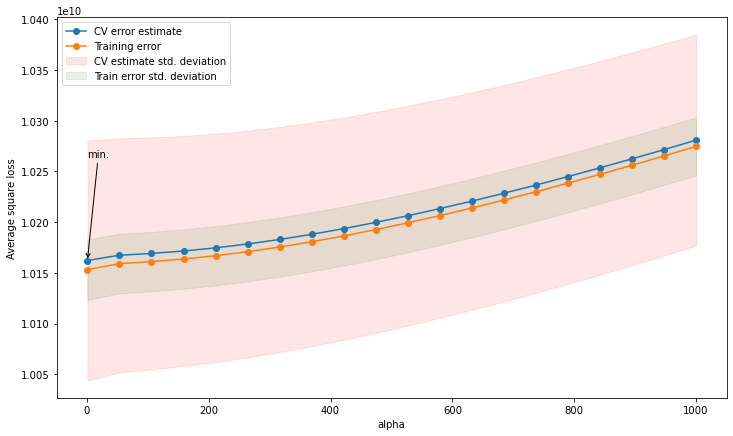

{'best_parameter': 1.0, 'cv_risk_score': 10162154705.0334}


In [311]:
valc_len = ValidationCurve(X, Y, 'unit_length', True)
train_cv_len, val_cv_len = valc_len.val_curve_ridge(np.linspace(1, 1000, 20), 5, 100)

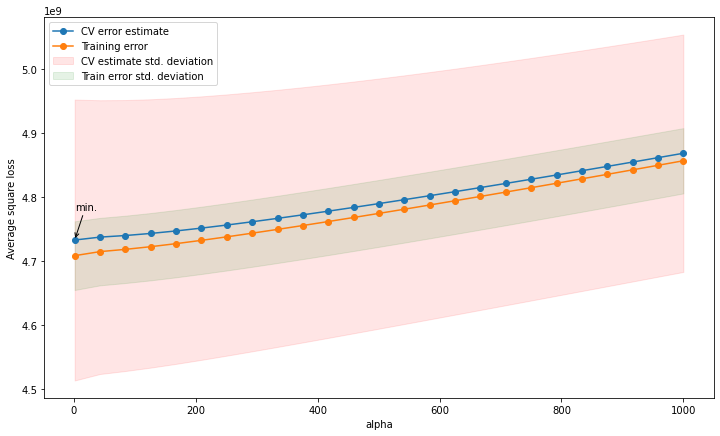

{'best_parameter': 1.0, 'cv_risk_score': 4732955016.7778}


In [312]:
valc_std = ValidationCurve(X, Y, 'standardization', True)
train_cv_std, val_cv_std = valc_std.val_curve_ridge(np.linspace(1, 1000, 25), 5, 100)

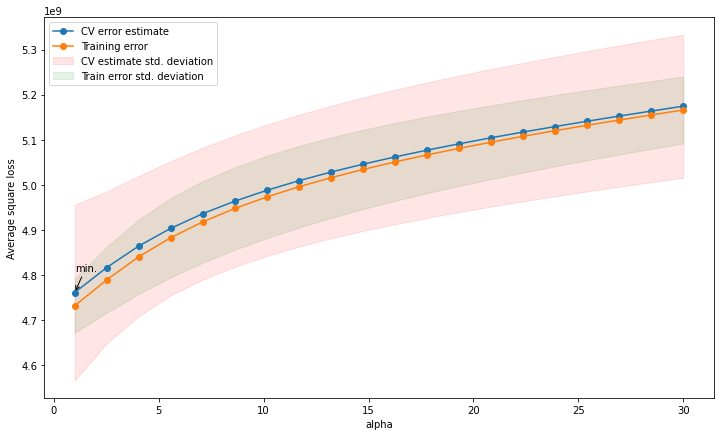

{'best_parameter': 1.0, 'cv_risk_score': 4760656225.798399}


In [313]:
valc_norm = ValidationCurve(X, Y, 'normalization', True)
train_cv_norm, val_cv_norm = valc_norm.val_curve_ridge(np.linspace(1, 30, 20), 5, 100)

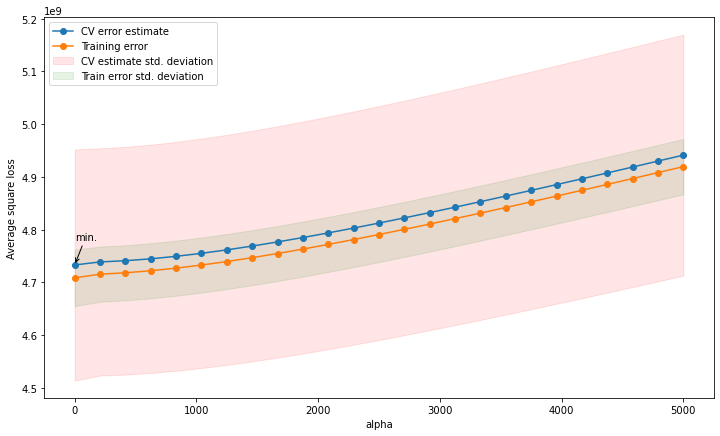

{'best_parameter': 1.0, 'cv_risk_score': 4732981086.4482}


In [314]:
valc = ValidationCurve(X, Y, None, True)
train_cv, val_cv = valc.val_curve_ridge(np.linspace(1, 5000, 25), 5, 100)

In [257]:
print(np.format_float_scientific(4732981086.4482), # NO SCALING
np.format_float_scientific(4732955016.7778), # standardization
np.format_float_scientific(4760656225.798399), # normalization
"\n", np.format_float_scientific(10162154705.0334)) # unit-length scaling

4.7329810864482e+09 4.7329550167778e+09 4.760656225798399e+09 
 1.01621547050334e+10


---

## Principal Component Analysis

In this regression setting, to improve the risk estimate of the output predictor of the learning algorithm $\underset{\alpha \in A} {min} E[\ell_D(A_\alpha)]$, with the best value of the hyperparameter $\alpha$, we can perform *Principal Component Analysis* (PCA). The main idea of PCA is to reduce the dimensionality of the features to a new artificial subspace, whose dimensions account for an appropriate percentage of variance explained. Coherently, we would apply a linear transformation to the matrix of features and select smaller number of directions, without loosing too much information with respect to the original dataset. For instance, the datapoints belong to a $d=13$-dimensional space, thus we would reduce their dimensionality by projecting them onto a new space spanned by a subset of the new linearly independent vectors (orthogonal). In mathematical terms, we would exploit the *Singular Value Decomposition* (SVD), which is the generalization to non-square matrices of the *Spectral Decomposition*, in order to define the matrix of the features $\mathbf{X}_j$ as the product of the three matrices, each of them with specific characteristics:

$$\mathbf {X} = U \Sigma V^T$$

The matrix $U$ contains the eigenvectors of the matrix $XX^T$ as columns, while $\Sigma$ is a *diagonal matrix* with the eigenvalues of the matrix $\sqrt{X^T X}$ and $V$ is the matrix with the eigenvectors of $X^T X$ as columns (the same of $U$ and are by definition orthogonal to each other), which form a basis for a *d*-dimensional space. In addition, both the matrices $U$ and $V$ are orthonormal, namely the dot product between their column vectors is zero and they all have norm equal to one ($\lVert \mathbf {X_i} \rVert = 1$ for $i = 1, ..., d$), while the eigenvalues in the diagonal of $\Sigma$ are ordered with respect to their magnitude, which gives information about the geometry of the data. The eigenvectors contained in $U$, which are associated to the correspondent eigenvalues in the $\Sigma$ matrix, represent the directions onto which the data vary the most, so we could apply them as a linear transformation to the original features in order to project the data onto a new low-dimesonal space spanned by the orthogonal eigenvectors. Of course, a criterion should be used to select the number of principal components to project the datapoints which should explain a reasonable amount of the total variance. For instance, the new dimensions would be ranked on the basis of the percentage of explained variances, thus it would be useless to select the components starting from the bottom of the $V^T$ matrix, as they represent the dimensions which account for the lowest explained variance. Therefore, it is likely that plotting the new features onto the last eigenvectors would not be so informative as they explain the minimum amount of variance relatively to the remaining principal components. A widely used criterion for selecting the proper number of principal components is to inspect the *screeplot*, which displays graphically the amount of variance explained for each singolar value, and look for an *elbow*. In other words, search for a point in which the subsequent variance explained drops off relevantly, so that there is a rapid reduction, and retrieve all the number of components up to that value. However, since the results obtained would highly depend on the new artificial features selected, it would be a more accurate strategy to inspect the behaviour of the estimated empirical risk for *d'*-number of components with $d' \in [2, 12]$. 

### $\downarrow$ +++ ARGUMENTS OF THE PCA CLASS +++ $\downarrow$

Coreherently, we have added to the `ValidationCurve()` class the '*val_curve_pca*' function, which allows to inspect the learning curve of the ridge learner for a range of values of $d'$, by means of k-fold cross validation, and takes four arguments:

- **grid_princomp**: numpy.array; set of values for the number of principal component of the ridge learner, allowed $p'\in [2,12]$.

- **seed**: integer; seed used when defining the observations in each fold, for reproducibility of the results.

- **loss_fun**: string; the value of the loss function to be computed {'mse', 'root_mse'}.

- **show_plot**: boolean; default = True, if the plot of the learning curve should be displayed, containing the standard errors of the estimates (shaded area).

To perform this dimensionality reduction method we have created a class of functions defined as '*PCA*', from which the init function of the 'PCA' object takes as only argument the scaled training features according to one of the presented methods (None if the original values should be used). However, when finding the new dimensions, PCA gives emphasis to the computation of the variance for each predictor in the set of features, thus it is highly sensitive to the magnitude of the square deviations from the mean. Therefore, since the original features have different unit of measures, it would be meaningless to perform PCA in this case as a small difference from the mean value, with large magnitude in absolute terms, could mislead the true variability of the data. Hence, we would focus mosly on the application of principal component analysis on scaled data and inspect how the new low-dimensional subspaces approximate the data, even though we would also take a look at the erroneous case with the setting ```PCA(X_train)``` (non-scaled data).

Now, we would create four *PCA* objects for each transformation of the features and their original version:

- ```pca_len```: PCA object to reduce the dimensionality of the unit-length predictors in the training set.
- ```pca_std```: PCA object to reduce the dimensionality of the standardized predictors in the training set.
- ```pca_norm```: PCA object to reduce the dimensionality of the normalized predictors in the training set.
- ```pca```: PCA object to reduce the dimensionality of the original predictors in the training set.

Firstly, the method *singular_values* is recalled from the each object, without setting any argument, and it is assigned to three variables representing the matrices in which the features are decomposed, namely $U, \Sigma,$ and $V$. In particular, the $\Sigma$ matrix would be used as argument of the *variance_explained* method and it would return the corresponding screeplot, together with the array containing the cumulative percentage of variance up to the thirteenth dimension. As before, the plot can be inspected to select the appropriate number of principal components on which the dimensionality of the features can be reduced, on the basis of the selected criterion. 

**+++ COMMENTS ABOUT SCREEPLOT AND CUMULATIVE VARIANCE +++**

Once the number of principal components are selected, we can recall the *'projected_features'* method to compute the new low-dimensional features, setting the following two arguments:

- **n_components**: integer; the number of dimensions of the new low-dimensional features, allowed $p'\in [2,12]$.

- **show_plot**: boolean; if *n_components = 2*, and *show_plot = True*, then the features would be plotted in the new two-dimensional space.

This method would return a dataframe of the new features according to the selected number of principal components, with dimensions $\mathbf{X}_{n \times p'}$, which would then be used as predictors on which the ridge learner would be trained. However, the new coordinates of the datapoints do not represent the original predictors anymore so, even though they may improve the performance of the models, the principal components reduce the interpretability of the resulting regression coefficients. In addition, to give reasons about the unsuitability of PCA with set of variables having different unit of measures, we would plot the new predictors in a two-dimensional space resulting from each PCA object, which of course account for different percentage of variance. This, would help to get a visual representation of the data, with the *x-axis* which generally represents the dimension accounting for the largest percentage of variance explained (first principal component).

**+++ COMMENTS ABOUT THE PROJECTED FEATURES IN TWO-DIMENSIONS +++**

In addition, the PCA class contains the function *project_test* to apply the same dimensionality reduction method to the features of the test set, set as the only argument, separately from the training one in order not to break the indepence among them. This function would be useful when analyzing the learning curve for the range of principal components passed as argument of the *val_curve_pca* method. Coherently, when performing cross validation, PCA would firstly be performed on the scaled $k-1$ training folds, then on the $k$-th transformed test fold, this for each iteration of the algorithm. In particular, the $\alpha$ used as hyperparameter of the ridge learner would be the best one found according to the *val_curve* method, namely the one which minimized the cross validation risk estimate. Before performing the analysis, we could say that we would expect the estimated error to be on certain intervals a decreasing function of the number of the principal components, since adding subsequent dimensions to the datapoints, especially for small number of singular values, would increase the explained variance, thus reducing the estimated errors. However, as we have seen from the previous screeplots, there are some principal components whose explained variance is relatively low or it actually approximates zero, so it could be the case that, at a certaing point, increasing the number of dimensions would result in overfitting as $p'\rightarrow  13$.

**+++ COMMENTS ABOUT THE VALIDATION CURVE OF PRINCIPAL COMPONENTS +++**

### **!!! The comments below are from the other ML file !!!**

Then, we would compute the singular values for the training set *'X_train'* using the previously described method for all the three objects, in order to obtain nine matrices of the same shape: $U_{13632 \times 13}, \Sigma_{13 \times 13}$ and $V^{T}_{13 \times 13}$, with $\Sigma$ which is a diagonal matrix (all zeros outside the main diagonal). Once the singular values are computed, we would retrieve the proportion of explained variance of each principal component, which we expect to be different with respect to scaled features and non-scaled. The resulting three plots are downward-sloping and coherently with our expectations, the explained variance of the singular values corresponding to the scaled features is more or less similar, even though normalization seems to work better since its first two dimensions explain together 52% of the total variance against 38% of standardization. In particular, for the standardized features the subsequent variance explained after seven principal components falls down, while the same happens for the normalized ones after six. Thus, we would reduce the dimensionality of the training features applying the linear operators $V^T_{std}: \rm I\!{R^{13}} \rightarrow \rm I\!{R^7}$ and $V^T_{norm}: \rm I\!{R^{13}} \rightarrow \rm I\!{R^6}$, which both explain approximately 90% of the variability of the original dataset respectively.

However, with non-scaled features we end up in a result which is misleading, because the 93% of explained variance is entirely due to the fact that the all attributes have different units of measure. For example, most of the variance could be driven by the square deviation of the *'total_rooms'* attribute from its mean value rather than the one of *'housing_median_age'*. In fact, we could see in the corresponding graph that there is an elbow above two principal components because the explained variance of the subsequent dimensions approximates zero being not so informative. In addition, projecting the original features (without being transformed) onto those two directions would basically result in a well spread visual representation of the data, even though this is inaccurate and could lead to inappropriate findings. In fact, the plot of the linear operator: $V^T: \rm I\!{R^{13}} \rightarrow \rm I\!{R^2}$ applied to the original dataset reveals a large spread of the data, mainly for negative values of the first component and positive ones for the second. However, applying the same transformation to the scaled features either standardizard or normalized would not produce the same result, because the true variability of the data contained in the new subspace spanned by the two eigenvectors of $V^T$ is way lower than 93% as in the previous case. In particular, we clearly see two clusters with similar values with respect to the standardized features while they are mostly spread along the first component when data are normalized, with the visual improvement that is due to the higher fraction of explained variance. 

So, what we do now is to perform both Ridge Regression and validation curve for the dimensionality reduced features, six dimensions for the normalized ones and seven for the standardized. Therefore, we create two *'RidgeRegression'* objects with $\alpha = 1$, the *'intercept'* flag set to *True* and the *'scale_transform'* one set to *None*, since the already transformed data would be fitted: 'X_train_pca_std' and 'X_train_pca_norm'. In addition, the reason behind the inclusion of the intercept in both regressions is justified by the lower estimated errors of the previously fitted models which contained it, compared to the ones for which it was not added. Once the *'fit'* method is applied, we need to reduce the dimensionality of the test features in order to predict them and get an estimate of the error, thus we created two other objects of the class *'PCA'*, one for each type of transformation. The resulted projected features now have compatible dimensions with the training ones, 'X_test_pca_std'$_{7 \times 5842}$ and 'X_test_pca_norm'$_{8 \times 5842}$, thereore we recall the *'predict'* method using them as arguments and we compute the prediction errors in both forms ('mse'/'root_mse'). They clearly show that PCA does not improve the risk estimates, this is because both estimates are higher than previously computed errors, with the one of the standardized features which is way higher than the normalized one, with $RMSE = 237284.4$ and $RMSE = 112643.8$ respectively. Therefore, what we can do now is some hyperparameter tuning to see if the combination of different tries for the $\alpha$-penalty with the 10-fold cross validation could actually decrease the estimated test error, hence we perform a standard validation curve for the same sequence of values as before. Coherently, we use the standardized and normalized features obtained through PCA as features argument of the *'val_curve'* function, thus we specify not to perform any transformation of those training attributes and we take a look at the resulting plots. Both cv estimates end up to be remarkably lower than the previous ones, even though they overfits as the regularization term gets larger. In particular, they led the lowest risk estimate for $\alpha = 1$, but the normalized version experienced a relevant increment overall the graph while the normalized one slightly increased until reaching the maximum of $RMSE = 64289.2$. However, in both cases the validation and training error's curve are almost overlapping, namely the algorithm performed in the validation set as good as in the training one, even though there was still larger variance in the former one rather than in the latter as it is depicted in the shaded areas of the two graphs.

On the contrary, the results previously presented could be sensitive to the number of chosen principal components, thus it could be interesting to analyze whether the risk estimates could be improved if subsequent dimensions are added to features. Therefore, we created a slightly modified version of the previous function for computing the validation curve that is now defined as *'val_curve_pca'*, which basically differ with respect to the sequence of values of the fitted Ridge regression. In particular, instead of different values of the penalty parameter $\alpha$, we would set a range of values for the desired linear transformation to be applied to the features for which the following condition holds: $p' \geq 2 \land p' < p=13$. This is because choosing only one principal component would be meaningless while choosing the upper limit of the range would be the same of performing ridge regression with the original dataset, since the dimensionality remains the same. On the contrary, the required value of the hyperparameter $\alpha$ would not be a sequence as before but only a single integer, which could be selected based on the previously computed validation curve so that is leads to the lowest square loss (or RMSE). The remaining arguments of the function require to specify the required transformation of the features ('standardization'/'normalization'), the loss function ('root_mse'/'mse'), the features and their corresponding lables and two integer values for the 'k'-number of folds for cross validation and the seed for reproducibility of the results. In addition, we would expect the estimated error to be on certain intervals a decreasing function of the number of the selected principal components, namely adding subsequent dimensions to the data when the number of dimensions is low would be likely to increase more the explained variance, thus reducing the estimated errors. However, as we have seen from the previous results there are some singular values for which the explained variance is relatively low or it approximates zero, so it could actually be the case that adding certain number of dimensions to the selected ones would decrease the error without $p'\approx p = 13$.

Therefore, we performed the principal component validation curve for the range of values: $p' \in [2,12]$ both for the standardized and normalized features. Compared to the previously selected values of principal components for the standardized case, there is a relevant decrease of the error up to six dimensions, while it continues to go down in a stationary way until the upper limit of the range. On the contrary, for the normalized features the estimate error ends up to be considerably lower from six to seven principal components, thus we would have reached a lower (R)MSE by simply selecting one more dimension, even though overall the values it continues to drop until the last value. However, coherently with the previous results the variability of the estimated errors in the validation set is always higher than the training one, for the same reason already discussed.

In [141]:
# Principal Component Analysis

class PCA() : 
      
    def __init__(self, scaled_features) : 
        
        self.scaled_features = scaled_features
        
          
    # Perform the singolar value decomposition on the features
    def singular_values(self):
        
        U, SIGMA, V_T = LA.svd(self.scaled_features, full_matrices = False)
        
        self.V_T = V_T
        
        return(U, SIGMA, V_T)
    
    
    # Computing the cumulative percentage of variance explained by the principal components
    def variance_explained(self, SIGMA_mat):
        
        percentages = np.zeros((len(SIGMA_mat), 1))
        
        for i in range(0, len(SIGMA_mat)):
            percentages[i] = SIGMA_mat[i]/np.sum(SIGMA_mat)
        
        plt.figure(figsize=(12,7))
        plt.plot(range(1,len(SIGMA_mat)+1), percentages)
        plt.xlabel('Singular Values')
        plt.ylabel('Explained variance')
        plt.title('Total variance explained for each principal component')
        plt.show()
        
        self.percentages = percentages
        
        return(percentages)
    
    
    # Project the features according to the selected principal components
    def projected_features(self, n_components, show_plot = False):
        
        proj_feat = np.transpose(self.V_T[:, :n_components].T @ self.scaled_features.T)
        
        col_names = np.repeat("DIM {}", n_components)
        
        for o in range(0, n_components):
            col_names[o] = col_names[o].format(o+1)
            
        self.n_components = n_components
        proj_feat.columns = col_names
        
        
        # Display projected features in a two-dimensional subspace
        if n_components == 2 and show_plot == True:
            
            plt.figure(figsize=(12,7))
            plt.scatter(proj_feat.iloc[:, 0], proj_feat.iloc[:, 1])
            plt.xlabel('First principal component')
            plt.ylabel('Second principal component')
            plt.title('PCA - California housing features')
            plt.show()
        
        return(proj_feat)
               
    
    # Project the test features according to the same number of components of the training set
    def project_test(self, scaled_test_features):
        
        pca_test = PCA(scaled_test_features)
        pca_test_u, pca_test_sigma, pca_test_vt = pca_test.singular_values()
        pca_test_proj = pca_test.projected_features(self.n_components)
        
        return(pca_test_proj)

# Inspect screeplot and select initial pc

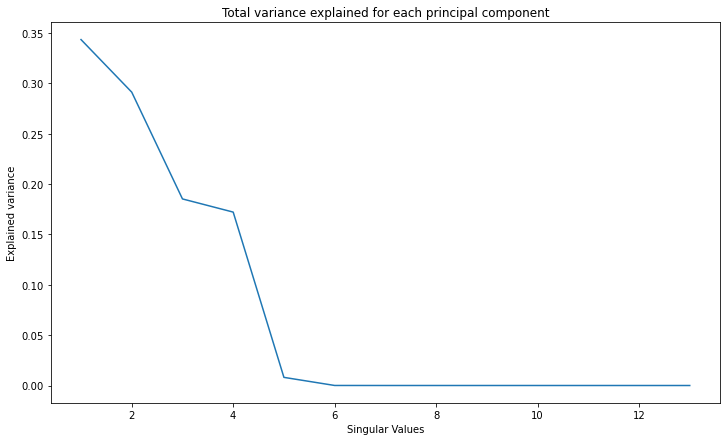

array([[0.34336525],
       [0.29116509],
       [0.18519488],
       [0.17211916],
       [0.00807795],
       [0.00003891],
       [0.00001303],
       [0.00000948],
       [0.00000763],
       [0.00000484],
       [0.00000241],
       [0.00000127],
       [0.0000001 ]])

In [106]:
X_len = unit_len.fit(X)

pca_len = PCA(X_len)

u_len, sig_len, vt_len = pca_len.singular_values()

pca_len.variance_explained(sig_len)

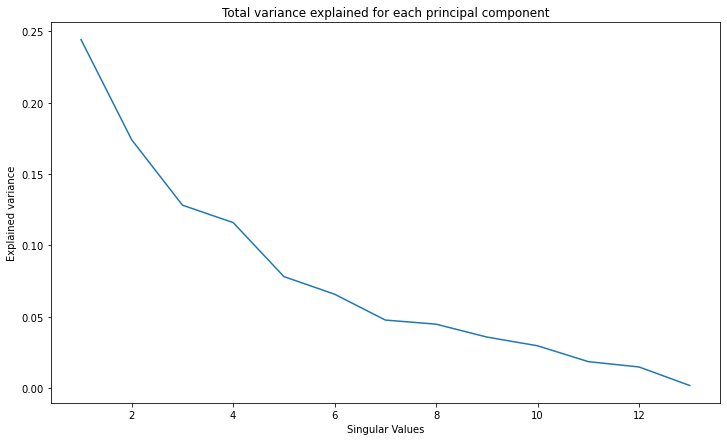

array([[0.24414388],
       [0.17393771],
       [0.12819199],
       [0.11598842],
       [0.07819281],
       [0.0658427 ],
       [0.04775108],
       [0.04486949],
       [0.03585201],
       [0.02974831],
       [0.01864523],
       [0.01490721],
       [0.00192915]])

In [107]:
standar = features_transformation(scale_transform = 'standardization')

X_std = standar.fit(X)

pca_std = PCA(X_std)

u_std, sig_std, vt_std = pca_std.singular_values()

pca_std.variance_explained(sig_std)

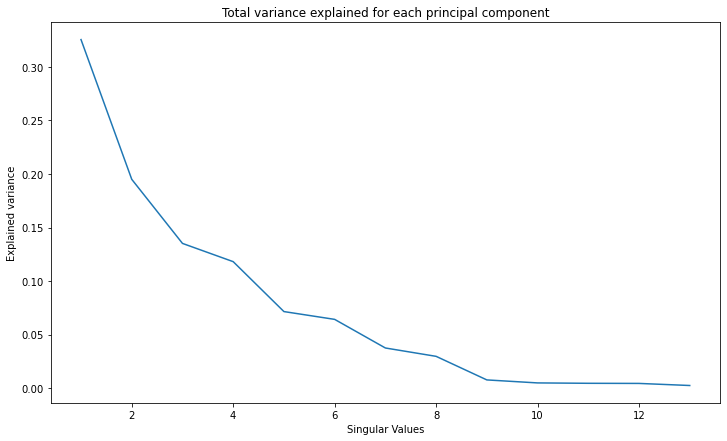

array([[0.32559323],
       [0.19502875],
       [0.1351395 ],
       [0.11809041],
       [0.07144609],
       [0.06416541],
       [0.03742346],
       [0.02961922],
       [0.00759219],
       [0.00478586],
       [0.00443024],
       [0.00431551],
       [0.00237013]])

In [108]:
normal = features_transformation(scale_transform = 'normalization')

X_norm = normal.fit(X)

pca_norm = PCA(X_norm)

u_norm, sig_norm, vt_norm = pca_norm.singular_values()

pca_norm.variance_explained(sig_norm)

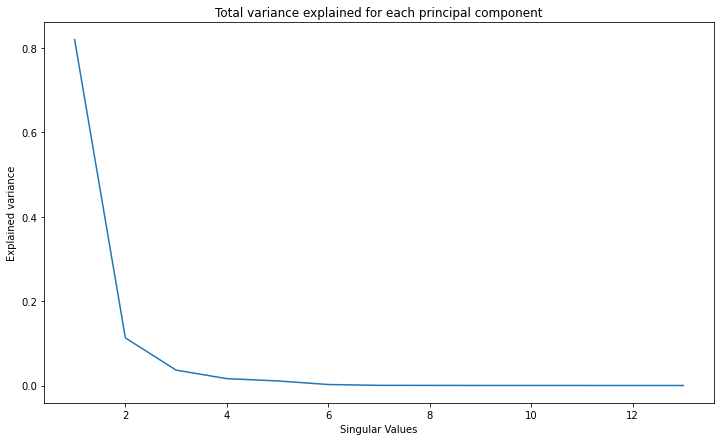

array([[0.8202402 ],
       [0.1129122 ],
       [0.03648223],
       [0.0162808 ],
       [0.01085425],
       [0.00233751],
       [0.00036296],
       [0.00027516],
       [0.00010345],
       [0.00008369],
       [0.00006339],
       [0.00000365],
       [0.00000051]])

In [109]:
pca = PCA(X)

u, sig, vt = pca.singular_values()

pca.variance_explained(sig)

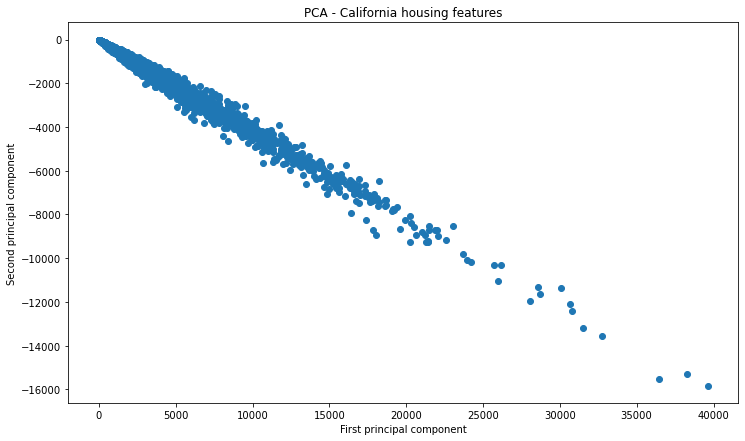

,DIM 1,DIM 2
0,871.807360,-359.460140
1,6982.735607,-2922.715767
2,1449.776499,-569.721246
3,1284.875141,-548.982336
4,1606.667137,-672.127387
...,...,...
20428,1704.398897,-752.593205
20429,715.663734,-300.406262
20430,2273.947040,-997.251310
20431,1855.478832,-810.120424


In [110]:
pca.projected_features(2, True)

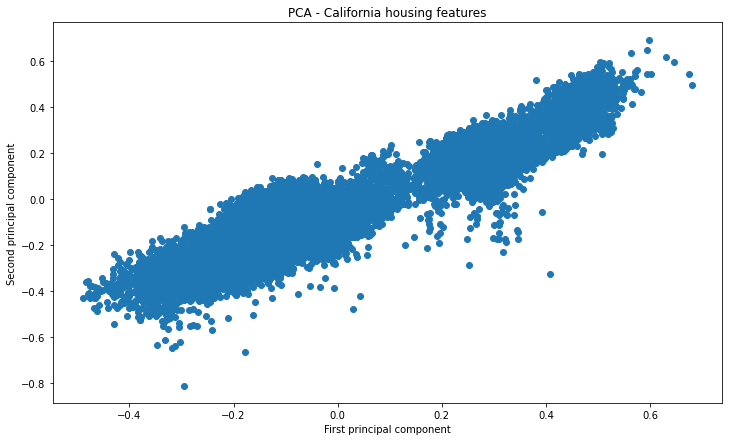

,DIM 1,DIM 2
0,0.041798,-0.018710
1,-0.011880,-0.047473
2,0.041985,-0.076427
3,0.016825,-0.107581
4,-0.016066,-0.137501
...,...,...
20428,-0.162127,-0.077110
20429,-0.153147,-0.010293
20430,-0.168903,-0.056617
20431,-0.157956,-0.045976


In [204]:
pca_norm.projected_features(2, True)

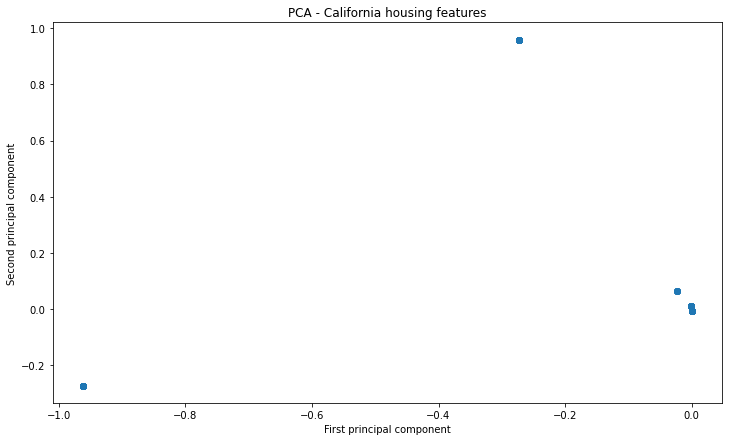

,DIM 1,DIM 2
0,-0.272218,0.959771
1,-0.272218,0.959772
2,-0.272218,0.959771
3,-0.272218,0.959771
4,-0.272218,0.959772
...,...,...
20428,0.000189,-0.009070
20429,0.000189,-0.009070
20430,0.000189,-0.009070
20431,0.000189,-0.009070


In [111]:
pca_len.projected_features(2, True)

# PC Validation Curve

(to tune the number of principal components as hyperparameter)

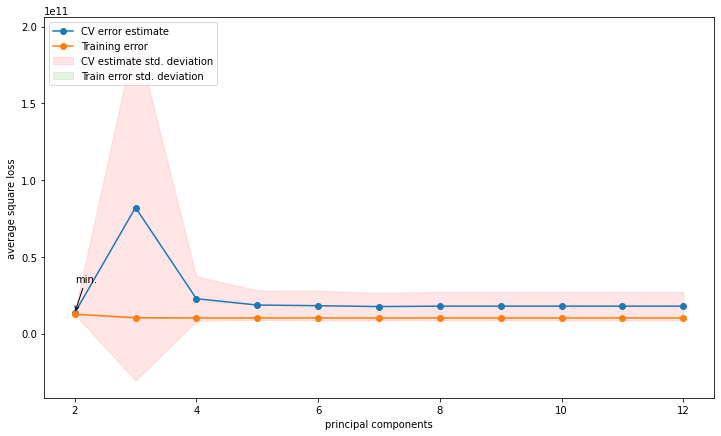

{'best_nprincomp': 2, 'cv_risk_score': 13305684349.950602}


In [315]:
train_pcacv_len, val_pcacv_len = valc_len.val_curve_pca(np.arange(2,13), 5, 100)

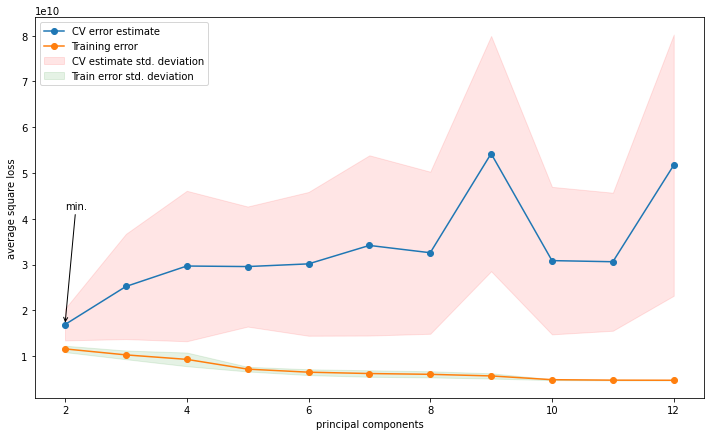

{'best_nprincomp': 2, 'cv_risk_score': 16885792147.551199}


In [316]:
train_pcacv_std, val_pcacv_std = valc_std.val_curve_pca(np.arange(2,13), 5, 100)

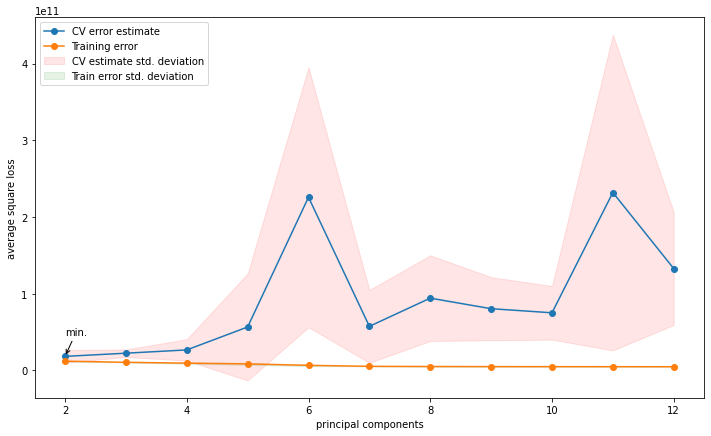

{'best_nprincomp': 2, 'cv_risk_score': 18238640723.5966}


In [317]:
train_pcacv_norm, val_pcacv_norm = valc_norm.val_curve_pca(np.arange(2,13), 5, 100)

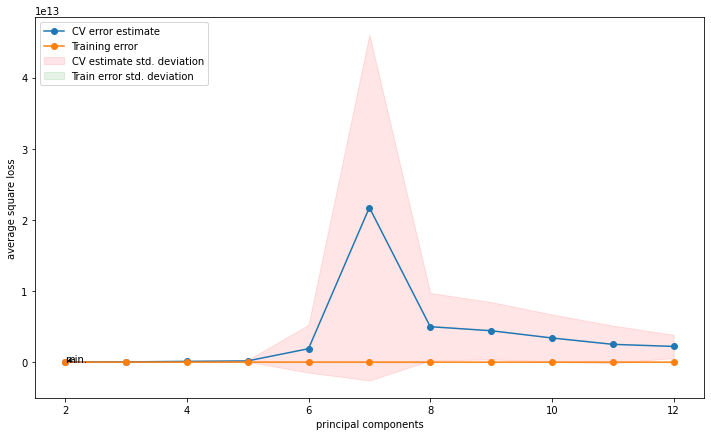

{'best_nprincomp': 2, 'cv_risk_score': 29185653607.710197}


In [318]:
# Additional reasoning of unsuitability of PCA with non-scaled features!

train_pcacv, val_pcacv = valc.val_curve_pca(np.arange(2,13), 5, 100)

In [241]:
np.format_float_scientific(29185653607.710197) # NO SCALING

'2.9185653607710197e+10'

In [242]:
np.format_float_scientific(16885792147.551199) # standardization

'1.6885792147551199e+10'

In [243]:
np.format_float_scientific(18238640723.5966) # normalization

'1.82386407235966e+10'

In [244]:
np.format_float_scientific(13305684349.950602) # unit-length scaling

'1.3305684349950602e+10'

---

# Nested Cross-Validation

In particular, the inner cross validation is performed at each step on the $k-1$ training folds of the outer level, with the $k'$-number of inner folds which could be either the same as the one of the external loop $k' = k$ or different $k' > k$ | $k' < k$. The inner loop is exploited to reduce the bias of the ridge learner, which is trained on a smaller number of observations, and for hyperparameter tuning, in order to optimize the choice of the regularization term. Hence, the inner cross validation would be performed for each value in the grid of $\alpha$ and the hyperparameter corresponding to the model with the lowest cv risk estimate would be trained on the $k-1$ outer training folds, while it is evaluated on the $k$-th validation fold. Hence, the external cross validation would be used to evaluate the performance of the ridge learner and the mean of the $k$-number of scores of the outer validation fold is used as nested cross validation estimate, which could be potentially be obtained with different values of $\alpha$.

In [263]:
def nested_cv(features, labels, f_scaling, grid_alpha, k_inner, k_outer, seed, include_intercept = True):
    
    # Arrays for the training/validation errors and 
    outval_errors = np.zeros((1, k_outer))
    innval_errors = np.zeros((len(grid_alpha), k_inner))
    bestinn_alphas = np.zeros((1, k_outer))
    
    # +++ Random shuffle of the features and labels +++
    idx_nested = np.random.RandomState(seed = seed).permutation(len(features))
    feat_shuff, labl_shuff = features.loc[idx_nested, :], labels.loc[idx_nested, :]
    
    # Creation of the outer folds [k_outer] of the features and labels
    feat_out_folds, labl_out_folds = np.array_split(feat_shuff, k_outer), np.array_split(labl_shuff, k_outer)
    
    # Outer Cross-Validtion (more reliable error estimates)
    for i in range(0, k_outer):
        
        # Partitioning the outer set in training and test portion
        outf_val = feat_out_folds[i]
        outl_val = labl_out_folds[i]
            
        outf_train = feat_shuff.drop(outf_val.index)
        outl_train = labl_shuff.drop(outl_val.index)
        
        # Partitioning the outer training test in "k_inner"-folds
        feat_inn_folds, labl_inn_folds = np.array_split(outf_train, k_inner), np.array_split(outl_train, k_inner)
        
        # Inner Cross-Validation (hyperparameter tuning)
        for alp in range(0, len(grid_alpha)):
            
            for inn in range(0, k_inner):
                
                # Partitioning the inner set in training and test portion
                innf_val = feat_inn_folds[inn]
                innl_val = labl_inn_folds[inn]
                
                innf_train = outf_train.drop(innf_val.index)
                innl_train = outl_train.drop(innl_val.index)
                
                # Scale of the features separately in the inner set
                if f_scaling is not None:
                    transformer = features_transformation(scale_transform = f_scaling)
                    innf_train = transformer.fit(innf_train)
                    innf_val = transformer.test_transform(innf_val)
                
                # Ridge Regression in the inner set
                ridge_nested = Ridge(alpha = grid_alpha[alp], intercept = include_intercept)
                ridge_nested.fit(innf_train, innl_train)     
                
                # Square loss in the inner loop
                innval_pred = ridge_nested.predict(innf_val)
                innval_errors[alp, inn] = np.mean((innval_pred - innl_val)**2)
        
        # Retrieving the best alpha in each inner set (for each outer training portion)
        innval_mean = np.mean(innval_errors, axis = 1)
        bestinn_alphas[0,i] = grid_alpha[np.where(innval_mean == np.min(innval_mean))]
        
        # Ridge Regression in the outer set with the corresponding best alpha
        ridge_outer = Ridge(alpha = bestinn_alphas[0,i], intercept = include_intercept)
        
        # Scale the features separately in the outer set
        if f_scaling is not None:
            transformer = features_transformation(scale_transform = f_scaling)
            outf_train = transformer.fit(outf_train)
            outf_val = transformer.test_transform(outf_val)
        
        # Fit of the outer training portion
        ridge_outer.fit(outf_train, outl_train)
        
        # Square loss in the outer loop        
        outval_pred = ridge_outer.predict(outf_val)
        outval_errors[0, i] = np.mean((outval_pred - outl_val)**2)
            
    nestedcv_score = np.mean(outval_errors)
    print("Nested CV risk estimate is: ")
        
    return(nestedcv_score)

In [ ]:
#%timeit for 5 FOLDS!

In [269]:
nested_cv(X, Y, 'unit_length', np.linspace(1, 5000, 20), 3, 5, 100)

Nested CV risk estimate is: 


10162154705.033722

2.17 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [270]:
nested_cv(X, Y, 'standardization', np.linspace(1, 5000, 20), 3, 5, 100)

Nested CV risk estimate is: 


4732955016.777669

2.91 s ± 226 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [271]:
nested_cv(X, Y, 'normalization', np.linspace(1, 5000, 20), 3, 5, 100)

Nested CV risk estimate is: 


4760656225.798572

3.43 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [272]:
nested_cv(X, Y, None, np.linspace(1, 5000, 20), 3, 5, 100)

Nested CV risk estimate is: 


4732981086.448187

2.86 s ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [273]:
print(np.format_float_scientific(4732981086.448187), # NO SCALING
np.format_float_scientific(4732955016.777669), # standardization
np.format_float_scientific(4760656225.798572), # normalization
"\n", np.format_float_scientific(10162154705.033722)) # unit-length scaling

4.732981086448187e+09 4.732955016777669e+09 4.760656225798572e+09 
 1.0162154705033722e+10


---